In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd

# Load data

## Read sentence for each ALIGNED article csv file with train set and test set.

In [2]:
df_train_transcript = pd.read_csv('./CORPUS/HANJA/HANJA_TRAIN_ALL.csv')
df_train_transcript = df_train_transcript.to_dict(orient='dict')

TRAIN_KSENT = (list(df_train_transcript['KO'].values()))
TRAIN_KSENT.remove('\"')

TRAIN_ZSENT = (list(df_train_transcript['ZH'].values()))
TRAIN_ZSENT.remove('”')

TRAIN_HSENT = (list(df_train_transcript['HANJA_Z'].values()))
TRAIN_HSENT.remove('\"')

#TRAIN_HSENT = (list(df_train_transcript['HANJA_K'].values()))
#TRAIN_HSENT.remove('\"')

print(len(TRAIN_KSENT))
df_train_transcript = []

146660


In [3]:
df_test_transcript = pd.read_csv('./CORPUS/HANJA/HANJA_TEST_ALL.csv')
df_test_transcript = df_test_transcript.to_dict(orient='dict')

TEST_KSENT = (list(df_test_transcript['KO'].values()))
TEST_ZSENT = (list(df_test_transcript['ZH'].values()))
TEST_HSENT = (list(df_test_transcript['HANJA_Z'].values()))
#TEST_HSENT = (list(df_test_transcript['HANJA_K'].values()))

df_test_transcript = []
print(len(TEST_KSENT))

36089


In [4]:
df_train_zhuyin = pd.read_csv('./CORPUS/ZHUYIN/ZHUYIN_TRAIN_ALL.csv')
df_train_zhuyin = df_train_zhuyin.to_dict(orient='dict')

TRAIN_ZYSENT = (list(df_train_zhuyin['zhuyin'].values()))
TRAIN_ZYSENT.remove(np.nan)
TRAIN_ZYSENT = [sent.replace('\n','') for sent in TRAIN_ZYSENT]

df_train_zhuyin = []
print(len(TRAIN_ZYSENT))

146660


In [5]:
df_test_zhuyin = pd.read_csv('./CORPUS/ZHUYIN/ZHUYIN_TEST_ALL.csv')
df_test_zhuyin = df_test_zhuyin.to_dict(orient='dict')

TEST_ZYSENT = [sent.replace('\n','') for sent in (list(df_test_zhuyin['zhuyin'].values()))]

df_test_transcript = []
print(len(TEST_ZYSENT))

36089


In [6]:
def find_delete_indexs(src_lists,dst_lists):
    delete_indexs = {}
    for i in range(len(src_lists)):
        if(len(src_lists[i]) < 3 or len(dst_lists[i]) < 3):
            delete_indexs[i] = 1
            print(i,src_lists[i], dst_lists[i])
    return list(delete_indexs.keys())

In [7]:
def delete_indexs_items(lists,delete_indexs):
    delete_indexs.reverse()
    for i in delete_indexs:
        del lists[i]
    return lists

In [8]:
train_del_idxs = find_delete_indexs(TRAIN_ZSENT,TRAIN_KSENT)
TRAIN_ZSENT = delete_indexs_items(TRAIN_ZSENT,train_del_idxs)
TRAIN_KSENT = delete_indexs_items(TRAIN_KSENT,train_del_idxs)
TRAIN_HSENT = delete_indexs_items(TRAIN_HSENT,train_del_idxs)
TRAIN_ZYSENT = delete_indexs_items(TRAIN_ZYSENT,train_del_idxs)
print(len(TRAIN_ZSENT),len(TRAIN_KSENT),len(TRAIN_HSENT),len(TRAIN_ZYSENT))

1685 （掌聲） 박수
2315 不! 절대! 아닙니다!
6228 嗨。 안녕하세요.
6447 謝謝 감사합니다.!
9080 好! 알겠습니다.
10567 是的。 네.
11806 十？ 열 개? 우리는 질문해야 합니다.
11991 」 ”
13214 嗨。 안녕하세요.
14710 不。 아뇨.
31278 好。 좋아요.
33767 好。 좋습니다.
34090 什麼？ 뭐라
36726 不！ 아니죠.
39959 嗨！ 안녕하세요.
40878 你。 바로 여러분입니다.
46783 謝謝 감사합니다
51043 哇。 오우.
64302 好。 좋아요.
66859 」 " 저.. 회사의 관리자가 당신에게 심장 판막을 보내지 않기로 결정했습니다.
74805 人。 무언가는, 어 딘가는 언제나 변했을 겁니다.
76821 嗨！ 신발끈에도 패턴이 있기 때문입니다.
77330 在她於1917年過世時，這些夢想仍未實現。 ”
77331 」 감사합니다.
82234 摸。 이분은 조나 단이고 37세이며 석사 학위를 가지고 있습니다.
88883 因為和穆斯林結盟來對抗基督教夥伴所造成的憤怒讓他也失去了所有剩下的當地支援。 "
88884 」 다른 방법으로는 생각지도 못할 아이디어를 얻을 수 있습니다.
89997 好。 눈은 계속 감고 계시 고요 차이점을 들으셨나요?
93311 嗨。 제 수염이 반쪽만 있는 걸 눈치 채셨을 겁니다.
94843 透過讚美自由言論及讚頌平凡英雄，他的劇作讓觀眾在歡笑的同時也能有所思考。 "
94844 」 감사합니다.
98549 好。 모두 앉아 주세요.
100655 當時，我一直有修練松濤館空手道，從我有印象以來都在練，所以我已經拿了黑帶。 네.
101007 對？ ( 웃음) 이 시계의 무게는 기계적으로 조정되어서 계속해서 천천히 작동하도록 되어 있습니다.
105530 嗨！ ( 박수와 함성) 2020년 3월 이후로 사람들 보는 게 처음이에요.
108350 很多那些成功的男人都不喜歡聽到我說為什麼我不需要男朋友。 네.
110284 謝謝 그리고 우리가 다음에 가야 할 길을 방향 잡을 수 있을 것입니다.
113692 樹。 ( 긁는 소리) 이렇

In [9]:
test_del_idxs = find_delete_indexs(TEST_ZSENT,TEST_KSENT)
TEST_ZSENT = delete_indexs_items(TEST_ZSENT,test_del_idxs)
TEST_KSENT = delete_indexs_items(TEST_KSENT,test_del_idxs)
TEST_HSENT = delete_indexs_items(TEST_HSENT,test_del_idxs)
TEST_ZYSENT = delete_indexs_items(TEST_ZYSENT,test_del_idxs)
print(len(TEST_ZSENT),len(TEST_KSENT),len(TEST_HSENT),len(TEST_ZYSENT))

3566 」 "
5206 」 "
6312 不。 아닙니다.
10187 是的。 네.
11109 好。 좋아요.
12403 嗨。 안녕하세요?
12441 」 ”
12901 不！ 아닙니다!
15159 謝謝 감사합니다.
17733 不。 아닙니다.
18956 是的。 네.
19868 」 "
22513 好。 좋아요.
23679 」 " 는 말을 요.
25285 冰。 얼음이고요.
29343 嗨！ 그러니까... 안녕하세요!
34778 不。 아니죠.
36072 36072 36072 36072


In [10]:
print(TRAIN_ZYSENT[0])
print(TEST_ZYSENT[0])

ㄒㄧㄝˋㄒㄧㄝˋㄉㄚˋㄐㄧㄚ。
ㄨㄛˇㄒㄧㄤㄒㄧㄣˋㄖㄨˊㄍㄨㄛˇㄋㄧˇㄍㄟˇㄊㄚㄇㄣ˙ㄓㄥˋㄑㄩㄝˋㄉㄜ˙ㄈㄤㄈㄚˇㄏㄜˊㄍㄨㄥㄐㄩˋ，ㄊㄚㄇㄣ˙ㄎㄜˇㄧˇㄅㄚˇㄕㄢㄉㄡㄓㄨㄢˇㄧˊㄌㄜ˙ㄒㄧㄝˋㄒㄧㄝˋ（ㄍㄨˇㄓㄤˇㄕㄥ）


## TED2020 Dataset

In [2]:
df_train_transcript = pd.read_csv('./CORPUS/ted2020/TED2020_HANJA_TRAIN_ALL.csv')
df_train_transcript = df_train_transcript.to_dict(orient='dict')

TRAIN_KSENT = (list(df_train_transcript['KO'].values()))

TRAIN_ZSENT = (list(df_train_transcript['ZH'].values()))

TRAIN_HSENT = (list(df_train_transcript['HANJA_Z'].values()))

print(len(TRAIN_KSENT))
df_train_transcript = []

311376


In [3]:
df_test_transcript = pd.read_csv('./CORPUS/ted2020/TED2020_HANJA_TEST_ALL.csv')
df_test_transcript = df_test_transcript.to_dict(orient='dict')

TEST_KSENT = (list(df_test_transcript['KO'].values()))
TEST_ZSENT = (list(df_test_transcript['ZH'].values()))
TEST_HSENT = (list(df_test_transcript['HANJA_Z'].values()))
#TEST_HSENT = (list(df_test_transcript['HANJA_K'].values()))

df_test_transcript = []
print(len(TEST_KSENT))

77844


In [4]:
df_train_zhuyin = pd.read_csv('./CORPUS/ted2020/TED2020_TRAIN_ALL_ZHUYIN.csv')
df_train_zhuyin = df_train_zhuyin.to_dict(orient='dict')

TRAIN_ZYSENT = (list(df_train_zhuyin['zhuyin'].values()))

TRAIN_ZYSENT = [str(sent).replace('\n','') for sent in TRAIN_ZYSENT]

df_train_zhuyin = []
print(len(TRAIN_ZYSENT))

311376


In [5]:
df_test_zhuyin = pd.read_csv('./CORPUS/ted2020/TED2020_TEST_ALL_ZHUYIN.csv')
df_test_zhuyin = df_test_zhuyin.to_dict(orient='dict')

TEST_ZYSENT = [str(sent).replace('\n','') for sent in (list(df_test_zhuyin['zhuyin'].values()))]

df_test_transcript = []
print(len(TEST_ZYSENT))

77844


# Pretrain Model

In [10]:
import torch
from transformers import BertTokenizer, BertModel, BertConfig, BertForPreTraining, AutoModel, BertTokenizerFast
from torch.utils.data import Dataset, DataLoader
from transformers import BertConfig, BertForMaskedLM
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import time

## Set parameters

In [11]:
# 設定訓練參數
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
max_length = 32
#batch_size = 16
batch_size = 32
learning_rate = 1e-4
num_epochs = 100


In [13]:
print(device)

cuda


## Load Tokenizer

### Chinese Tokenizer

In [12]:
#zh_tokenizer = BertTokenizer.from_pretrained('./MODELS/TOKENIZER/new_zh_tokenizer_add_bpmf_korean_tokens_v2') # load bert-base-chinese tokenizer with bpmf、hangul tokens(from 'kykim/bert-kor-base' and konlpy)
zh_tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese')

In [13]:
# zhuyin tokens
import re
zhuyins = ['ㄅ','ㄆ','ㄇ','ㄈ','ㄉ','ㄊ','ㄋ','ㄌ','ㄍ','ㄎ','ㄏ','ㄐ','ㄑ','ㄒ','ㄓ','ㄔ','ㄕ','ㄖ','ㄗ','ㄘ','ㄙ','ㄧ','ㄨ','ㄩ','ㄚ','ㄛ','ㄜ','ㄝ','ㄞ','ㄟ','ㄠ','ㄡ','ㄢ','ㄣ','ㄤ','ㄥ','ㄦ','ˇ','ˋ','ˊ','˙']

def check_bpmf_is_not(text):
    test_list = ['.*[ㄅㄆㄇㄈㄉㄊㄋㄌㄍㄎㄏㄐㄑㄒㄓㄔㄕㄖㄗㄘㄙㄧㄨㄩㄚㄛㄜㄝㄞㄟㄠㄡㄢㄣㄤㄥㄦˇˋˊ˙]+.*']
    for t in test_list:
        valid = re.compile(t)
        try:
            if(valid.match(text) != None):
                return True
        except:
            return False
    return False

zhuyin_df = pd.read_csv('./CORPUS/TOKEN/zhuyin_tokens_count.csv')
zhuyin_df = zhuyin_df.to_dict(orient='dict')
zhuyin_tokens = list(zhuyin_df['zhuyin'].values())
print(len(zhuyin_tokens))

for tok in zhuyin_tokens:
  if(check_bpmf_is_not(tok)):
    continue
  else:
    zhuyin_tokens.remove(tok)
print('zy:',len(zhuyins))
print('zy tokens:',len(zhuyin_tokens))

2751
zy: 41
zy tokens: 2089


In [14]:
# korean tokens
ko_tokenizer = BertTokenizerFast.from_pretrained("kykim/bert-kor-base")
ko_tokenizer_tokens = list(ko_tokenizer.get_vocab().keys())
print(len(ko_tokenizer_tokens))

42000


In [15]:
# add new tokens
zh_tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese')
print('Original Length: ',len(zh_tokenizer))

zh_tokenizer.add_tokens(zhuyins)
print('Add zhuyins: ',len(zh_tokenizer))

zh_tokenizer.add_tokens(zhuyin_tokens)
print('Add zhuyin tokens: ',len(zh_tokenizer))

zh_tokenizer.add_tokens(ko_tokenizer_tokens)
print('Add korean tokens from kykim/bert-kor-base tokenizer: ',len(zh_tokenizer))

Original Length:  21128
Add zhuyins:  21146
Add zhuyin tokens:  22839
Add korean tokens from kykim/bert-kor-base tokenizer:  63662


In [16]:
zh_bert_model = AutoModel.from_pretrained('ckiplab/bert-base-chinese')
zh_bert_model.resize_token_embeddings(len(zh_tokenizer))

Some weights of BertModel were not initialized from the model checkpoint at ckiplab/bert-base-chinese and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Embedding(63662, 768)

### Korean Tokenizer

In [ ]:
ko_tokenizer = BertTokenizerFast.from_pretrained("kykim/bert-kor-base")

tokenizer_config.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/344k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

In [ ]:
ko_bert_model = BertModel.from_pretrained("kykim/bert-kor-base")

### mbert

In [ ]:
mbert_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [ ]:
mbert_model = BertModel.from_pretrained('bert-base-multilingual-cased').to(device)


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

### chinese bert with phonetic

In [17]:
my_tokenizer = zh_tokenizer
tgt_tokenizer = zh_tokenizer
#model_name = 'ZK9_zh_no_hanja_no_zh_v2' # use bert model : my_zh_model train() with dropout
#model_name = 'ZK9_zh_no_hanja_no_zh_v3' # use bert model : my_zh_model eval() with dropout
#model_name = 'ZK9_zh_no_hanja_no_zh_v4' # use bert model : original model eval() with dropout
#model_name = 'TED_ZK9_zh_no_hanja_no_zh' # use bert model : original model train() with dropout
model_name = 'ZK9_zh_no_hanja_no_zy' # use bert model : original model train() with dropout

In [18]:
my_model = zh_bert_model
#my_model.load_state_dict(torch.load('./MODELS/BERTS/my_zh_model.pth'))
my_model = my_model.to(device)
#my_model.eval()

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 15.69 GiB of which 40.62 MiB is free. Process 3592193 has 14.13 GiB memory in use. Including non-PyTorch memory, this process has 606.00 MiB memory in use. Of the allocated memory 350.76 MiB is allocated by PyTorch, and 19.24 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
'''
my_hanja_model = zh_bert_model
my_hanja_model = my_hanja_model.to(device)
my_hanja_model.load_state_dict(torch.load('./MODELS/BERTS/my_hanja_model.pth'))
my_hanja_model.eval()

In [ ]:
'''
my_bpmf_model = zh_bert_model
my_bpmf_model = my_bpmf_model.to(device)
my_bpmf_model.load_state_dict(torch.load('./MODELS/BERTS/my_bpmf_model.pth'))
my_bpmf_model.eval()

### Get Embeddings

In [ ]:
# 输入文本
text = TEST_HSENT[923]
print(text)
# 使用 mBERT 分词器对文本进行编码
inputs = mbert_tokenizer(text, return_tensors='pt', padding=True, truncation=True).to(device)

# 将输入传递给 mBERT 模型以获取输出
with torch.no_grad():
    outputs = mbert_model(**inputs)

# 提取嵌入
embeddings = outputs.last_hidden_state

print(embeddings)

그러다 結局에는 그냥 屈伏下故 末乃 버리綿 적어도 多飮에는 아무 日 없을 거라고 生角하는 持經까지 이르렀습니다. 패배자可 된 느낌이었죠.
tensor([[[-1.2058e-01, -1.4019e-01, -7.5852e-01,  ...,  5.7960e-01,
           1.4735e-01,  5.7352e-02],
         [-6.1292e-01, -7.4539e-01, -8.3502e-02,  ...,  9.6286e-01,
           3.0688e-01,  2.5471e-02],
         [-4.5489e-01, -6.0978e-01, -3.0158e-01,  ...,  1.0734e+00,
           2.0139e-01,  4.8326e-02],
         ...,
         [ 2.7903e-03, -8.0216e-02, -1.0318e+00,  ...,  5.6032e-01,
          -8.0176e-04,  3.7377e-01],
         [-1.9213e-01, -3.8575e-01, -6.5699e-01,  ...,  7.4177e-01,
          -1.2330e-01,  3.6022e-01],
         [-3.7075e-01, -2.1907e-01, -5.3335e-01,  ...,  7.2308e-01,
           2.5642e-01,  7.5225e-02]]])


In [15]:
# my_zh_model
text = TEST_HSENT[923]
print(text)
# 使用 mBERT 分词器对文本进行编码
inputs = zh_tokenizer(text, return_tensors='pt', padding=True, truncation=True).to(device)

# 将输入传递给 mBERT 模型以获取输出
with torch.no_grad():
    outputs = my_model(**inputs)

# 提取嵌入
embeddings = outputs.last_hidden_state

print(embeddings)

1994년도義 南 아프리카 共和國義 民主酒蟻路疑 變幻殷 牛李에게 말그대로, 꿈의 實現 이었습니다. 
tensor([[[ 0.4539, -0.0473, -0.1252,  ..., -0.0150,  0.2754,  0.2246],
         [ 0.2028, -0.1798,  0.0435,  ...,  0.7129,  1.1715, -0.2255],
         [ 0.2783, -0.8658, -0.4960,  ...,  1.1696,  0.8914,  0.1094],
         ...,
         [ 0.9248, -0.6796, -0.2644,  ...,  0.6522,  0.7148, -0.1465],
         [ 0.5105, -0.3579, -0.0180,  ...,  0.3177,  0.4877,  0.0644],
         [ 0.4539, -0.0473, -0.1252,  ..., -0.0150,  0.2754,  0.2246]]],
       device='cuda:0')


In [29]:
# my_hanja_model
text = TEST_HSENT[923]
print(text)
# 使用 mBERT 分词器对文本进行编码
inputs = zh_tokenizer(text, return_tensors='pt', padding=True, truncation=True).to(device)

# 将输入传递给 mBERT 模型以获取输出
with torch.no_grad():
    outputs = my_hanja_model(**inputs)

# 提取嵌入
embeddings = outputs.last_hidden_state

print(embeddings)

그러다 結局에는 그냥 屈伏下故 末乃 버리綿 적어도 多飮에는 아무 日 없을 거라고 生角하는 持經까지 이르렀습니다. 패배자可 된 느낌이었죠.
tensor([[[ 1.3054e+00, -4.4438e+00, -2.7001e+00,  ..., -1.7835e+00,
           5.2322e+00, -3.3590e-03],
         [-3.1215e+00, -1.4925e+00, -6.2478e-01,  ...,  2.7746e+00,
           3.1170e+00, -3.9944e-02],
         [-8.0472e+00,  2.1473e+00, -6.6213e+00,  ...,  1.5663e+00,
           3.7195e+00, -5.0157e-02],
         ...,
         [-5.2369e+00, -4.1304e+00,  8.6563e-01,  ..., -2.1396e+00,
           2.4739e+00, -4.3135e-02],
         [ 3.7941e-01, -2.1414e+00,  3.5418e+00,  ..., -3.2351e+00,
          -1.3752e+00, -4.2022e-02],
         [-1.5264e-02, -2.2320e+00,  2.6621e+00,  ...,  3.1985e+00,
          -4.9516e+00, -5.2329e-02]]], device='cuda:0')


In [30]:
# my_bpmf_model
text = TEST_HSENT[923]
print(text)
# 使用 mBERT 分词器对文本进行编码
inputs = zh_tokenizer(text, return_tensors='pt', padding=True, truncation=True).to(device)

# 将输入传递给 mBERT 模型以获取输出
with torch.no_grad():
    outputs = my_bpmf_model(**inputs)

# 提取嵌入
embeddings = outputs.last_hidden_state

print(embeddings)

그러다 結局에는 그냥 屈伏下故 末乃 버리綿 적어도 多飮에는 아무 日 없을 거라고 生角하는 持經까지 이르렀습니다. 패배자可 된 느낌이었죠.
tensor([[[ 1.3054e+00, -4.4438e+00, -2.7001e+00,  ..., -1.7835e+00,
           5.2322e+00, -3.3590e-03],
         [-3.1215e+00, -1.4925e+00, -6.2478e-01,  ...,  2.7746e+00,
           3.1170e+00, -3.9944e-02],
         [-8.0472e+00,  2.1473e+00, -6.6213e+00,  ...,  1.5663e+00,
           3.7195e+00, -5.0157e-02],
         ...,
         [-5.2369e+00, -4.1304e+00,  8.6563e-01,  ..., -2.1396e+00,
           2.4739e+00, -4.3135e-02],
         [ 3.7941e-01, -2.1414e+00,  3.5418e+00,  ..., -3.2351e+00,
          -1.3752e+00, -4.2022e-02],
         [-1.5264e-02, -2.2320e+00,  2.6621e+00,  ...,  3.1985e+00,
          -4.9516e+00, -5.2329e-02]]], device='cuda:0')


In [ ]:
# mbert_model
print(TEST_ZSENT[923])
text = TEST_ZYSENT[923]
print(text)
# 使用 mBERT 分词器对文本进行编码
inputs = mbert_tokenizer(text, return_tensors='pt', padding=True, truncation=True).to(device)
print(inputs['input_ids'])
print(mbert_tokenizer.decode(inputs['input_ids'][0], skip_special_tokens=True))
# 将输入传递给 mBERT 模型以获取输出
with torch.no_grad():
    outputs = mbert_model(**inputs)

# 提取嵌入
embeddings = outputs.last_hidden_state

print(embeddings)

In [20]:
# 输入文本
print(TEST_ZSENT[923])
text = TEST_ZYSENT[923]
print(text)
# 使用 mBERT 分词器对文本进行编码
inputs = zh_tokenizer(text, return_tensors='pt', padding=True, truncation=True).to(device)
print(inputs['input_ids'])
print(zh_tokenizer.decode(inputs['input_ids'][0], skip_special_tokens=True))

# 将输入传递给 mBERT 模型以获取输出
with torch.no_grad():
    outputs = my_model(**inputs)

# 提取嵌入
embeddings = outputs.last_hidden_state

print(embeddings)

到最後我覺得，乾脆屈服熬過去，至少到下次再發生前我能得到點平靜。
ㄉㄠˋㄗㄨㄟˋㄏㄡˋㄨㄛˇㄐㄩㄝˊㄉㄜ˙，ㄍㄢㄘㄨㄟˋㄑㄩㄈㄨˊㄠˊㄍㄨㄛˋㄑㄩˋ，ㄓˋㄕㄠˇㄉㄠˋㄒㄧㄚˋㄘˋㄗㄞˋㄈㄚㄕㄥㄑㄧㄢˊㄨㄛˇㄋㄥˊㄉㄜ˙ㄉㄠˋㄉㄧㄢˇㄆㄧㄥˊㄐㄧㄥˋ。
tensor([[  101, 21212, 21314, 21222, 21160, 21298, 21178,  8024, 21847, 21669,
         21683, 21566, 22097, 21245, 21282,  8024, 21248, 21326, 21212, 21250,
         21176, 21159, 21463, 21158, 21164, 21160, 21293, 21178, 21212, 21330,
         21347, 21360,   511,   102]], device='cuda:0')
ㄉㄠˋ ㄗㄨㄟˋ ㄏㄡˋ ㄨㄛˇ ㄐㄩㄝˊ ㄉㄜ˙ ， ㄍㄢ ㄘㄨㄟˋ ㄑㄩ ㄈㄨˊ ㄠˊ ㄍㄨㄛˋ ㄑㄩˋ ， ㄓˋ ㄕㄠˇ ㄉㄠˋ ㄒㄧㄚˋ ㄘˋ ㄗㄞˋ ㄈㄚ ㄕㄥ ㄑㄧㄢˊ ㄨㄛˇ ㄋㄥˊ ㄉㄜ˙ ㄉㄠˋ ㄉㄧㄢˇ ㄆㄧㄥˊ ㄐㄧㄥˋ 。
tensor([[[ 1.0444,  0.4776, -0.3137,  ...,  0.0884,  0.1758,  0.2491],
         [ 0.0394,  0.7345, -0.6138,  ...,  0.5273,  0.5974, -0.1578],
         [ 0.6699,  0.8073, -0.6991,  ...,  1.1291,  0.5514, -0.5418],
         ...,
         [ 0.0758,  0.1053, -0.7919,  ...,  1.0411,  0.2645, -0.2673],
         [ 0.3935,  0.5438,  0.7982,  ...,  0.5464, -0.4632,  0.2710],
         [ 1.0444,  0.4776, -0.3137,  ...,  0.0884,  0.1758,  0.2491]]],
       device='

### Build Dataset Function

In [19]:
# 假設您有一個平行語料庫，這是您的資料集
class TranslationDataset(Dataset):
    def __init__(self, source_sentences, target_sentences):
        self.source_sentences = source_sentences
        self.target_sentences = target_sentences
        self.length = len(source_sentences)

    def __len__(self):
        return self.length

    def __getitem__(self, index):
        source = self.source_sentences[index]
        target = self.target_sentences[index]
        
        source_token = my_tokenizer(source, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length)
        target_token = tgt_tokenizer(target, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length)

        
        
        #print(index)
        return source, target, source_token, target_token


### Build Model

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [16]:
'''
class TranslationModel(nn.Module):
    def __init__(self, bert_model, dropout_prob=0.1):
        super(TranslationModel, self).__init__()
        self.bert1 = bert_model
        self.dropout1 = nn.Dropout(dropout_prob)
        self.linear = nn.Linear(self.bert1.config.hidden_size, len(tgt_tokenizer))

    def forward(self, input_ids, attention_mask):
        zh_outputs = self.bert1(input_ids=input_ids, attention_mask=attention_mask)

        # Apply dropout
        zh_outputs = self.dropout1(zh_outputs.last_hidden_state)
        prediction_scores = self.linear(zh_outputs)
        return prediction_scores


In [21]:
class TranslationModel(nn.Module):
    def __init__(self, bert_model, dropout_prob=0.1):
        super(TranslationModel, self).__init__()
        self.bert1 = bert_model
        self.dropout1 = nn.Dropout(dropout_prob)
        #self.linear = nn.Linear(self.bert1.config.hidden_size, len(tgt_tokenizer))
        self.linear = nn.Linear(my_model.config.hidden_size, len(tgt_tokenizer))

    def forward(self, input_ids, attention_mask):
        zh_outputs = self.bert1(input_ids=input_ids, attention_mask=attention_mask)
        #zh_outputs = my_model(input_ids=input_ids, attention_mask=attention_mask)

        # Apply dropout
        zh_outputs = self.dropout1(zh_outputs.last_hidden_state)
        prediction_scores = self.linear(zh_outputs)
        return prediction_scores


### Data Loader

In [22]:
# 載入資料集
train_source_sentences = TRAIN_ZSENT  # 中文句子
train_target_sentences = TRAIN_KSENT  # 韓文句子
dataset = TranslationDataset(train_source_sentences, train_target_sentences)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [23]:
test_source_sentences = TEST_ZSENT  # 中文句子
test_target_sentences = TEST_KSENT  # 韓文句子
test_dataset = TranslationDataset(test_source_sentences, test_target_sentences)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [24]:
start = time.time()
for batch in dataloader:
        source, target, source_tokens, target_tokens  = batch
end = time.time()
print(int((end-start)/60),'m',(end-start)%60,'s')

0 m 25.568806648254395 s


In [25]:
start = time.time()
for batch in test_dataloader:
        source, target, source_tokens, target_tokens  = batch
end = time.time()
print(int((end-start)/60),'m',(end-start)%60,'s')

0 m 6.2127768993377686 s


### Model

In [26]:
# 初始化模型、損失函數和優化器
model = TranslationModel(my_model).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 15.69 GiB of which 40.62 MiB is free. Process 3592193 has 14.13 GiB memory in use. Including non-PyTorch memory, this process has 606.00 MiB memory in use. Of the allocated memory 350.76 MiB is allocated by PyTorch, and 19.24 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
# 加載訓練好的模型
#model = TranslationModel(model_mbert).to(device)
model.load_state_dict(torch.load('./MODELS/best_translation_model({}).pth'.format(model_name)))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ZH-KO-TRANSLATOR/MODELS/best_translation_model(ZK9_only_zh_add_hanja&zy_token).pth'

### Train and Evaluate

In [24]:
def epoch_time(start_time, end_time):
  elapsed_time = end_time - start_time
  elapsed_mins = int(elapsed_time/60)
  elapsed_secs = int(elapsed_time%60)
  return elapsed_mins, elapsed_secs

In [25]:
!pip install tqdm

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [26]:
from tqdm import tqdm

In [27]:
def train(path):
    global model, dataloader, optimizer, criterion, my_tokenizer, tgt_tokenizer
    model.train()
    total_loss = 0
    with tqdm(total = len(dataloader)) as pbar:
      for batch in dataloader:
        source_batch, target_batch, source_tokens, target_tokens  = batch
        #print('source_tokens',source_tokens.input_ids.permute(1,0,2)[0].size())
          
        source_tokens_ids = source_tokens.input_ids.permute(1,0,2)[0].to(device)
        source_tokens_attns = source_tokens.attention_mask.permute(1,0,2)[0].to(device)
        target_tokens_ids = target_tokens.input_ids.permute(1,0,2)[0].to(device)
          
        #target_tokens_attns = target_tokens.to(device)
        #source_tokens = my_tokenizer(source_batch, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length).to(device)
        #target_tokens = tgt_tokenizer(target_batch, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length).to(device)
        optimizer.zero_grad()
        output = model(input_ids=source_tokens_ids,
                       attention_mask=source_tokens_attns)


        loss = criterion(output.transpose(1, 2), target_tokens_ids)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        pbar.update(1)
    torch.save(model.state_dict(), path)

    return total_loss/len(dataloader)

In [28]:
def evaluate():
  global model, test_dataloader, criterion, my_tokenizer, tgt_tokenizer
  model.eval()
  total_loss = 0
  with torch.no_grad():
    with tqdm(total = len(test_dataloader)) as pbar:
      for batch in test_dataloader:
        source_batch, target_batch, source_tokens, target_tokens  = batch
        source_tokens_ids = source_tokens.input_ids.permute(1,0,2)[0].to(device)
        source_tokens_attns = source_tokens.attention_mask.permute(1,0,2)[0].to(device)
        target_tokens_ids = target_tokens.input_ids.permute(1,0,2)[0].to(device)
        #source_tokens = my_tokenizer(source_batch, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length).to(device)
        #target_tokens = tgt_tokenizer(target_batch, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length).to(device)

        output = model(input_ids=source_tokens_ids, attention_mask=source_tokens_attns)
        loss = criterion(output.transpose(1, 2), target_tokens_ids)

        total_loss += loss.item()

        pbar.update(1)

  return total_loss/len(test_dataloader)

In [29]:
def loss_history(train_loss_values, test_loss_values, path='', to_show=False):
  before_train_loss = []
  before_test_loss = []
  try:
    df_loss = pd.read_csv('./MODELS/LOSS_HISTORY/loss_plot_{}.csv'.format(path))
    df_loss.to_dict(orient='dict')

    try:
      before_train_loss = list(df_loss['TRAIN_LOSS'].values())
      before_test_loss = list(df_loss['TEST_LOSS'].values())
    except:
      before_train_loss = list(df_loss['TRAIN_LOSS'])
      before_test_loss = list(df_loss['TEST_LOSS'])


  except:
    before_train_loss = []
    before_test_loss = []

  if(len(before_train_loss)>0):
    train_loss_values = before_train_loss + train_loss_values
    test_loss_values = before_test_loss + test_loss_values

  # 假設您有每個 epoch 的索引
  epochs = range(1, len(train_loss_values) + 1)
  plt.clf()

  # 繪製訓練損失和測試損失的折線圖
  plt.plot(epochs, train_loss_values, 'b', label='Training loss')
  plt.plot(epochs, test_loss_values, 'r', label='Test loss')
  plt.title('Training and Test Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # 儲存折線圖
  plt.savefig('./MODELS/LOSS_HISTORY/loss_plot_{}.png'.format(path))
  if to_show:
    plt.show()

  df_loss = pd.DataFrame({'TRAIN_LOSS':train_loss_values,'TEST_LOSS':test_loss_values})
  df_loss.to_csv('./MODELS/LOSS_HISTORY/loss_plot_{}.csv'.format(path),index=False)

In [30]:
def bleu_history(bleu_score_values, path='', to_show=False):
  before_bleu_score = []
  try:
    df_loss = pd.read_csv('./MODELS/LOSS_HISTORY/blue_plot_{}.csv'.format(path))
    df_loss.to_dict(orient='dict')

    try:
      before_bleu_score = list(df_loss['BLEU_SCORE'].values())
    except:
      before_bleu_score = list(df_loss['BLEU_SCORE'])


  except:
    before_bleu_score = []

  if(len(before_bleu_score)>0):
    bleu_score_values = before_bleu_score + bleu_score_values

  # 假設您有每個 epoch 的索引
  epochs = range(1, len(bleu_score_values) + 1)
  plt.clf()

  # 繪製訓練損失和測試損失的折線圖
  plt.plot(epochs, bleu_score_values, 'b', label='BLEU score')
  plt.title('BLEU SCORE')
  plt.xlabel('Epochs')
  plt.ylabel('Score')
  plt.legend()

  # 儲存折線圖
  plt.savefig('./MODELS/LOSS_HISTORY/blue_plot_{}.png'.format(path))
  if to_show:
    plt.show()

  df_loss = pd.DataFrame({'BLEU_SCORE':bleu_score_values})
  df_loss.to_csv('./MODELS/LOSS_HISTORY/blue_plot_{}.csv'.format(path),index=False)

In [31]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import SmoothingFunction

def bleu_score():
  global my_tokenizer, test_target_sentences, model, max_length, device
  model.eval()
  # 生成目標語句
  generated_sentences = []
  with tqdm(total = len(test_source_sentences)) as pbar:
    for source_sentence in test_source_sentences:
      source_tokens = my_tokenizer(source_sentence, padding=True, truncation=True, return_tensors='pt', max_length=max_length).to(device)
      with torch.no_grad():
        output = model(input_ids=source_tokens.input_ids, attention_mask=source_tokens.attention_mask)
      generated_sentence = my_tokenizer.decode(output[0].argmax(dim=-1), skip_special_tokens=True)
      generated_sentences.append(generated_sentence)
      pbar.update(1)


  # 計算 BLEU 分數
  smoothie = SmoothingFunction().method4
  bleu_score = corpus_bleu([[ref] for ref in test_target_sentences], generated_sentences, smoothing_function=smoothie)

  #print("BLEU 分數:", bleu_score)
  return bleu_score

In [38]:
!pip install sacrebleu

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [40]:
from sacrebleu.metrics import BLEU

def sacrebleu_score(model, source_sentences,target_sentences,lang='ko'):
  global my_tokenizer, tgt_tokenizer, max_length, device
  model.eval()
  bleu = BLEU()
  bleu.trg_lang = lang
  avg_score = {'avg':0,'1-gram':0,'2-gram':0,'3-gram':0,'4-gram':0}

  # 生成目標語句
  generated_sentences = []
  with tqdm(total = len(source_sentences)) as pbar:
    for i in range(len(source_sentences)):
        source_sentence = source_sentences[i]
        target_sentence = target_sentences[i]

        source_tokens = my_tokenizer(source_sentence, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length).to(device)
        #print('source_tokens',source_tokens.input_ids)
        
        with torch.no_grad():
            output = model(input_ids=source_tokens.input_ids,
                           attention_mask=source_tokens.attention_mask)
        generated_sentence = tgt_tokenizer.decode(output[0].argmax(dim=-1), skip_special_tokens=True)
        gen_sent = ''
        for sent in generated_sentence:
            gen_sent += sent
        generated_sentences.append(gen_sent)
        if(i > len(source_sentences)-5):
        #if(1):
            print('i=',i,'='*20)
            print('target_sentence',target_sentence)
            print('generate:',generated_sentence)
            print('output',output)
            print('='*20)
            
        pbar.update(1)
        '''
        bleu_score = bleu.corpus_score([gen_sent],[[target_sentence]])
        #print([gen_sent],[[target_sentence]])
        #print(bleu_score)
        avg_score['avg'] += bleu_score.score
        avg_score['1-gram'] += bleu_score.precisions[0]
        avg_score['2-gram'] += bleu_score.precisions[1]
        avg_score['3-gram'] += bleu_score.precisions[2]
        avg_score['4-gram'] += bleu_score.precisions[3]
  avg_score['avg'] /= len(source_sentences)
  avg_score['1-gram'] /= len(source_sentences)
  avg_score['2-gram'] /= len(source_sentences)
  avg_score['3-gram'] /= len(source_sentences)
  avg_score['4-gram'] /= len(source_sentences)
  '''
    target_sentences = [[ref] for ref in target_sentences]
    bleu_score = bleu.corpus_score(generated_sentences, target_sentences)
    avg_score['avg'] = bleu_score.score
    avg_score['1-gram'] = bleu_score.precisions[0]
    avg_score['2-gram'] = bleu_score.precisions[1]
    avg_score['3-gram'] = bleu_score.precisions[2]
    avg_score['4-gram'] = bleu_score.precisions[3]

  #print('gen:',generated_sentences,'tar:',[[sent] for sent in target_sentences],'sor',source_sentences)
  #print('BLEU Score:',bleu.score)

  return avg_score

In [33]:
def sacrebleu_history(bleu_score_values, path=model_name, to_show=False):
  before_avg_score = {}
  bleu_score_values = bleu_score_values[0]
  tag = ['avg','1-gram','2-gram','3-gram','4-gram']
  for key in tag:
    bleu_score_values[key] = [bleu_score_values[key]]

  try:
    df_loss = pd.read_csv('./MODELS/LOSS_HISTORY/sacreblue_plot_{}.csv'.format(path))
    df_loss.to_dict(orient='dict')
    try:
        for key in tag:
            before_avg_score[key] = list(df_loss[key].values())
    except:
        for key in tag:
            before_avg_score[key] = list(df_loss[key])


  except:
        for key in tag:
            before_avg_score[key] = []

  if(len(before_avg_score[tag[0]])>0):
        for key in tag:
            bleu_score_values[key] = before_avg_score[key] + bleu_score_values[key]
  print(bleu_score_values)
  # 假設您有每個 epoch 的索引
  try:
      epochs = range(1, len(bleu_score_values[tag[0]]) + 1)
  except:
      epochs = range(1,2)
  plt.clf()

  # 繪製訓練損失和測試損失的折線圖
  for key in tag:
        try:
            plt.plot(epochs, bleu_score_values[key], label=key)
        except:
            plt.plot(epochs, list(bleu_score_values[key]), label=key)
  plt.title('BLEU SCORE')
  plt.xlabel('Epochs')
  plt.ylabel('Score')
  plt.legend()

  # 儲存折線圖
  plt.savefig('./MODELS/LOSS_HISTORY/sacreblue_plot_{}.png'.format(path))
  if to_show:
    plt.show()

  df_loss = pd.DataFrame(bleu_score_values)
  df_loss.to_csv('./MODELS/LOSS_HISTORY/sacreblue_plot_{}.csv'.format(path),index=False)
  df_loss.head()

In [34]:
import random
def get_samples(src_list,tgt_list,keys=['zh','ko'],num=2000):
    samples = {}
    for k in keys:
        samples[k] = []
    randomlist = random.sample(range(0, len(src_list)), num)
    #print(randomlist[50:55])
    for i in randomlist:
        samples['zh'].append(src_list[i])
        samples['ko'].append(tgt_list[i])
    return samples

In [43]:
start_time = time.time()

samples = get_samples(TEST_ZSENT,TEST_KSENT,num=10)
#test_score = sacrebleu_score(model, source_sentences=samples['zh'],target_sentences=samples['ko'])
test_score = sacrebleu_score(model, source_sentences=TEST_ZSENT,target_sentences=TEST_KSENT)
end_time = time.time()
epoch_mins, epoch_secs = epoch_time(start_time, end_time)
print(f'Eval Time: {epoch_mins}m {epoch_secs}s')
    
print('\tBLEU Score:')
for k in test_score.keys():
    print('\t\t{}: {:.3f}'.format(k,test_score[k]))


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 77835/77844 [06:37<00:00, 193.39it/s]

i= 77840 ====================
target_sentence 팀 멤버와 코칭 스태프, 서포트 스태프 스포츠 심리학자들도 있었는데, 케이틀린이 아주 분명하게, 미안한 기색도 없이 말했어요. "저는 더 이상 잘하고 싶지 않아요" 
generate: 팀 팀의 팀의 코치 팀 팀 팀 팀 단체 팀을 그리고 쳤 스카 다 가 너 에, 과 스트 카 였 니.,...
output tensor([[[ -4.3113, -27.4764, -28.2549,  ..., -20.2170, -27.8947, -27.9214],
         [ -1.0162, -18.7226, -17.4484,  ..., -13.8740, -19.0492, -18.9432],
         [ -0.2534, -10.7807, -10.8776,  ...,  -9.9903, -10.5387, -10.9237],
         ...,
         [  4.5918, -15.0454, -14.8095,  ...,  -5.3504, -14.8372, -14.1309],
         [  5.1148, -15.2266, -14.9700,  ...,  -7.7341, -14.7210, -14.0702],
         [ 16.8036, -18.5880, -18.6337,  ...,  -9.1841, -18.5809, -18.8052]]],
       device='cuda:0')
i= 77841 ====================
target_sentence 국가 차원에서 이것을 계산하는 것은 한 측면이고 이미 시작되었어요. 
generate: 각각의 수치를 모든 이 계산 계산 시작합니다 시작합니다 시작합니다
output tensor([[[ -0.8942, -30.1720, -31.0259,  ..., -24.2228, -30.3872, -30.0668],
         [ -2.8886, -18.2915, -18.2290,  ..., -10.4238, -18.4989, -

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 77844/77844 [06:45<00:00, 192.14it/s]

Eval Time: 6m 45s
	BLEU Score:
		avg: 1.004
		1-gram: 14.182
		2-gram: 1.458
		3-gram: 0.436
		4-gram: 0.113


In [ ]:
!pip install rouge

In [ ]:
from rouge import Rouge

def rouge_score():
  global my_tokenizer, test_target_sentences, model, max_length, device
  total_score = 0
  model.eval()
  # 生成目標語句
  generated_sentences = []
  rouge = Rouge()
  with tqdm(total = len(test_source_sentences)) as pbar:
    for i in range(len(test_source_sentences)):
      source_tokens = my_tokenizer(test_source_sentences[i], padding=True, truncation=True, return_tensors='pt', max_length=max_length).to(device)
      with torch.no_grad():
        output = model(input_ids=source_tokens.input_ids, attention_mask=source_tokens.attention_mask)
      generated_sentence = my_tokenizer.decode(output[0].argmax(dim=-1), skip_special_tokens=True)
      try:
        scores = rouge.get_scores(generated_sentences, test_target_sentences[i])
      except:
        scores = 0
      print(generated_sentences)
      print(test_target_sentences[i])
      #print(generated_sentence)
      #for metric, score in scores.items():
      #  print(f"{metric}: {score}")
      total_score += scores
      pbar.update(1)

  avg_score = float(total_score)/len(test_source_sentences)
  print('Rouge Score:',avg_score)
  return avg_score

### Run

In [34]:
#!pip install --upgrade protobuf
!pip install wandb
!wandb login

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.6/281.6 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [36]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="Chinese-Korean-Translation",
    name=model_name,
    id='my_{}'.format(model_name),
    resume='allow',
    # track hyperparameters and run metadata
    config={
    "learning_rate": 1e-4,
    "architecture": "BERT",
    "dataset": "TEDTalks",
    "epochs": 100,
    }
)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Failed to detect the name of

In [37]:
best_loss = float('inf')
#best_loss = 4.291
#best_score = 1.132
best_score = 0

In [38]:
train_losses = []
test_losses = []

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:31<00:00, 14.07it/s]


Epoch 01 | Train Time: 11m 38s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.53it/s]


Epoch 01 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 192.88it/s]

i= 1996 ====================
target_sentence 인도네시아에서는 많은 열대 우림이 제거되었는데요. 그 총 크기는 아일랜드의 크기와 비슷합니다. 겨우 12년 만에 그렇게 된 것이죠. 
generate: 인도 에서는,, 열대 의 의 의 열대 림 림 대 0 0 0 0 0 0 0 년 년 년 년 년 0
output tensor([[[  6.1256, -11.3720, -11.3421,  ...,  -4.4107, -11.6402, -11.4584],
         [  3.3296, -10.6348,  -9.5718,  ...,  -4.8820, -10.5821, -10.4644],
         [  2.5843, -12.9375, -12.6565,  ...,  -6.5062, -13.1869, -13.0111],
         ...,
         [  7.3191, -12.0663, -12.0745,  ...,  -4.8192, -11.9353, -12.3356],
         [  7.3690, -11.7745, -11.8645,  ...,  -4.6863, -11.7671, -12.0094],
         [ 12.9249, -13.1849, -13.5081,  ...,  -6.1767, -13.3737, -13.3585]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 이러한 대처법은 끊임없이 새롭게 유지되어야 합니다 
generate: 이러한 방식은 계속 계속 합니다 합니다.
output tensor([[[  5.7258, -11.4307, -11.4482,  ...,  -4.6033, -11.6203, -11.4990],
         [  0.9375, -11.2725, -10.7093,  ...,  -5.9209, -10.8282, -11.0620],
         [  0.0886, -11.8426, -11.5081, 

== save model ==
	Train Loss: 3.727 | Test Loss: 3.740
	BLEU Score:
		avg: 1.245
		1-gram: 16.847
		2-gram: 1.773
		3-gram: 0.653
		4-gram: 0.158
{'avg': [0.1049915270848691, 1.2451767395632234], '1-gram': [0.2652519893899204, 16.846767726908244], '2-gram': [0.1424501424501424, 1.7732401934443847], '3-gram': [0.0769230769230769, 0.6531825757917024], '4-gram': [0.0418060200668896, 0.1582669766061625]}


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:31<00:00, 14.06it/s]


Epoch 02 | Train Time: 11m 36s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.42it/s]


Epoch 02 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 191.13it/s]

i= 1996 ====================
target_sentence 우리는 사람들에게 이건 덫이 아니라 말합니다. 아무도 당신이 바보라고 하지 않으며, 아무도 당신 경험이 상관없다 하지 않습니다. 
generate: 우리는 이 이 이........ 바보 바보 바보 바보 바보 바보 바보 바보...
output tensor([[[  5.2756, -12.2766, -12.5336,  ...,  -5.2108, -12.2047, -12.3395],
         [  0.2938, -12.7598, -13.0546,  ...,  -7.6506, -12.7688, -13.5743],
         [  1.4433, -13.4176, -14.5725,  ...,  -8.4435, -13.8448, -14.6765],
         ...,
         [  7.8512, -14.1683, -13.9866,  ...,  -7.7457, -14.0390, -14.2209],
         [  7.6234, -13.8032, -13.7416,  ...,  -7.7851, -13.7307, -13.9006],
         [ 14.3662, -14.3023, -14.0664,  ...,  -6.9103, -14.4035, -14.4862]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 그러나 같은 선택이라도 프로그래머가 미리 설정해 놓은 것이라면요? 미래의 이러한 상황에 대비해서요. 그건 좀 더 계획된 살인처럼 보이네요. 
generate: 하지만 프로그래 프로그래 가 가 이 이 지시 같은 행동을 행동을 행동을 행동을..,...
output tensor([[[  5.1153, -11.5951, -11.9175,  ...,  -4.1671, -11.6868, -11.9653],
         [  1.1621, -11.6609, -11.9243,  ...,  -5.

== save model ==
	Train Loss: 3.612 | Test Loss: 3.705
	BLEU Score:
		avg: 1.367
		1-gram: 16.482
		2-gram: 1.729
		3-gram: 0.619
		4-gram: 0.198
{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203], '2-gram': [0.1424501424501424, 1.7732401934443849, 1.7292970116193216], '3-gram': [0.0769230769230769, 0.6531825757917024, 0.6193907217798003], '4-gram': [0.0418060200668896, 0.1582669766061625, 0.19775570272259013]}


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.06it/s]


Epoch 03 | Train Time: 11m 38s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.25it/s]


Epoch 03 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 188.03it/s]

i= 1996 ====================
target_sentence 그러나 그러한 부의 파장에서는 사람들을 엄청나게 나은 영양상태를 갖게 해주었어요. 
generate: 하지만 이 은 은 은 더 더 더 영양 영양
output tensor([[[  5.2656, -13.4159, -13.5371,  ...,  -6.6516, -13.6628, -14.0693],
         [  1.0856, -13.3257, -12.8639,  ...,  -7.1387, -12.9176, -14.4379],
         [  0.8768, -13.6246, -13.3595,  ...,  -8.5098, -13.5110, -14.5158],
         ...,
         [ 17.7371, -19.0401, -18.6790,  ...,  -8.0212, -18.4273, -18.4337],
         [ 17.7565, -19.1691, -18.8342,  ...,  -8.0817, -18.5524, -18.5735],
         [ 17.9012, -19.3087, -18.9313,  ...,  -8.1796, -18.6455, -18.7343]]],
       device='cuda:0')
i= 1997 ====================
target_sentence '스턱스넷(Stuxnet)' 컴퓨터 웜의 개념은 사실 아주 단순합니다. 
generate: 컴퓨터 뱀 는 는 는 는 는 개념 매우 매우..
output tensor([[[ 4.6588e+00, -1.2049e+01, -1.1899e+01,  ..., -5.6174e+00,
          -1.2081e+01, -1.2289e+01],
         [ 1.6358e-02, -1.1876e+01, -1.2292e+01,  ..., -6.7752e+00,
          -1.2694e+01, -1.2585e+01],
         [ 1.7013e+00, -1

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 186.17it/s]


Epoch 03 | Eval Time: 0m 10s
	Train Loss: 3.514 | Test Loss: 3.707
	BLEU Score:
		avg: 0.885
		1-gram: 15.983
		2-gram: 1.394
		3-gram: 0.381
		4-gram: 0.072
{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503], '2-gram': [0.1424501424501424, 1.7732401934443849, 1.7292970116193216, 1.3936748602496363], '3-gram': [0.0769230769230769, 0.6531825757917024, 0.6193907217798003, 0.38144201666735766], '4-gram': [0.0418060200668896, 0.1582669766061625, 0.1977557027225901, 0.07227065359772347]}


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:31<00:00, 14.06it/s]


Epoch 04 | Train Time: 11m 37s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.41it/s]


Epoch 04 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 193.53it/s]


i= 1996 ====================
target_sentence 저는 호모 에렉투스 두개골과 큰 관련이 있는데 왜냐하면 이 호모 에렉투스가 숨을 거둘 당시 나이와 제 나이가 같았기 때문입니다. 
generate: 저는 골 골 골 기억 기억 기억 기억... 왜냐하면 왜냐하면 왜냐하면 그. 기 기 기
output tensor([[[  4.4921, -12.5098, -13.4927,  ...,  -5.8626, -13.2221, -12.7852],
         [  0.2422, -12.8570, -13.7711,  ...,  -5.9015, -13.2882, -13.5821],
         [  0.3405, -14.2161, -15.8810,  ...,  -7.0100, -15.0740, -15.5887],
         ...,
         [ 11.6873, -14.4157, -15.2214,  ...,  -4.9862, -14.7897, -15.1619],
         [ 12.0556, -14.3005, -14.9535,  ...,  -4.9091, -14.6315, -14.9042],
         [ 17.5239, -15.0812, -15.3396,  ...,  -6.4490, -15.0290, -15.6069]]],
       device='cuda:0')
i= 1997 ====================
target_sentence (웃음) 그렇지 않다면, 제가 질문을 했는데, 여러분의 답이 '네'라면, 여러분은 손뼉을 쳐주시면 좋겠습니다. 
generate: ( 웃음 ) 그래서 제가 질문을 질문을 질문을 질문을,,,,... 면 면. 주세요 주세요 주세요 주세요 주세요
output tensor([[[  4.6367, -13.5423, -14.2976,  ...,  -7.4665, -13.8591, -13.3980],
         [  3.2967, -13.6206, -14.4310,  ...,  -8.8

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:31<00:00, 14.07it/s]


Epoch 05 | Train Time: 11m 37s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.37it/s]


Epoch 05 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 189.72it/s]

i= 1996 ====================
target_sentence 부서들간의 업무 이양은 필요치 않았습니다. 
generate: 그들은 기관 계약 계약 계약 계약...
output tensor([[[  2.9901, -12.6608, -12.7965,  ...,  -6.4832, -12.6222, -12.5399],
         [ -0.0502, -12.0532, -12.3791,  ...,  -5.9506, -11.5019, -11.3627],
         [ -0.5458, -12.7838, -13.9366,  ...,  -5.2972, -12.1360, -12.2716],
         ...,
         [ 17.7560, -19.4588, -19.4757,  ...,  -8.3618, -19.1048, -19.3461],
         [ 17.7879, -19.4497, -19.4575,  ...,  -8.3507, -19.0906, -19.3248],
         [ 17.9847, -19.4761, -19.4500,  ...,  -8.4494, -19.1064, -19.3380]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 이 밥 한 공기? 
generate: 이 레스토랑?
output tensor([[[  3.2114, -14.1573, -14.3278,  ...,  -6.6321, -14.0693, -14.0783],
         [  1.4548, -11.6364, -11.1099,  ...,  -4.7682, -11.6010, -11.9528],
         [  2.2286, -12.3987, -12.6159,  ...,  -6.0088, -12.0159, -13.0112],
         ...,
         [ 18.2747, -20.8604, -20.8836,  ...,  -8.9444, -20.436

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107], '2-gram': [0.1424501424501424, 1.7732401934443849, 1.7292970116193216, 1.3936748602496365, 1.754256106587713, 1.6649206824304101], '3-gram': [0.0769230769230769, 0.6531825757917024, 0.6193907217798003, 0.3814420166673576, 0.5914794980417233, 0.537851827887415], '4-gram': [0.0418060200668896, 0.1582669766061625, 0.1977557027225901, 0.0722706535977234, 0.1779745626600685, 0.13190291945128385]}


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.06it/s]


Epoch 06 | Train Time: 11m 37s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.32it/s]


Epoch 06 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 191.27it/s]

i= 1996 ====================
target_sentence 그리고 말콤 글래드웰의 "아웃라이어"를 읽으신 분이 있을텐데요. 그의 성공 이론도 들어봤을 겁니다. 만 시간의 성공 법칙 말이죠. 
generate: 여러분들 중 몇 분들이 셨 셨 셨 셨 셨 셨 셨 셨 셨 들어보 들어보 들어보 들어보 들어보 들어보 셨 셨 들어보 들어보
output tensor([[[  2.9771, -14.0596, -13.2989,  ...,  -6.3778, -13.1152, -13.3092],
         [  1.5002, -12.5330, -12.3477,  ...,  -5.7571, -13.2104, -13.0226],
         [  1.1823, -11.3089, -12.0774,  ...,  -5.3726, -12.4684, -12.1656],
         ...,
         [  4.3969, -11.8497, -11.0162,  ...,  -4.9480, -11.4939, -11.8167],
         [  4.7605, -12.3833, -11.5494,  ...,  -4.9666, -12.1163, -12.2560],
         [ 11.5235, -15.1580, -15.4003,  ...,  -7.0290, -14.8621, -15.2906]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 인간의 인슐린과 다르게, 이 단백질은 화학적으로 구별할 수 없는 여러분의 췌장에서 나오는것과 같은 단백질입니다. 
generate: 이것은 슐 슐 슐 슐 과.. 슐 슐 슐 슐 슐 슐 슐 슐.
output tensor([[[  4.7026, -16.2237, -15.8255,  ...,  -9.7384, -15.5021, -15.9823],
         [  0.8018, -14.2660, -14.3058,  ...,  -8.8278, -14

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038413], '2-gram': [0.1424501424501424, 1.7732401934443849, 1.7292970116193216, 1.3936748602496365, 1.754256106587713, 1.66492068243041, 1.6210115933107623], '3-gram': [0.0769230769230769, 0.6531825757917024, 0.6193907217798003, 0.3814420166673576, 0.5914794980417233, 0.537851827887415, 0.484528135667878], '4-gram': [0.0418060200668896, 0.1582669766061625, 0.1977557027225901, 0.0722706535977234, 0.1779745626600685, 0.1319029194512838, 0.1266624445851805]}


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.06it/s]


Epoch 07 | Train Time: 11m 38s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.41it/s]


Epoch 07 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 189.03it/s]


i= 1996 ====================
target_sentence 부레옥잠 줄기를 엮어서 긴 밧줄로 만드는 방법을 배우는 제 여정은 그렇게 시작되었습니다. 
generate: 그래서 제가 제가 을 배 을 을 배 배 배... 배,,,,, 로 배 배 배 배 배 배
output tensor([[[  3.2221, -15.0013, -14.6287,  ...,  -8.0223, -14.4424, -14.6522],
         [  0.0293, -12.7557, -12.9421,  ...,  -7.4211, -12.7848, -13.1220],
         [  0.9697, -12.6954, -13.5833,  ...,  -6.7297, -13.1331, -13.7307],
         ...,
         [  6.1864, -13.0898, -12.7694,  ...,  -6.0595, -13.0855, -13.1307],
         [  7.0305, -13.5169, -13.4636,  ...,  -6.7649, -13.8567, -13.7923],
         [ 13.8180, -14.2907, -14.5397,  ...,  -7.3367, -14.3129, -14.4607]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 베이비그램이라고 불리는 건데요. 아이의 몸 전체를 엑스레이 촬영 한 것입니다. 
generate: 우리는 아기 아기 아기 아기 부 아기 아기 아기 아기...
output tensor([[[  6.9886, -14.6430, -14.1604,  ...,  -8.8315, -14.2174, -14.5826],
         [ -0.2588, -12.7804, -12.0082,  ...,  -5.6534, -12.8989, -12.8837],
         [ -0.8260, -13.9889, -13.1840,  ..

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.06it/s]


Epoch 08 | Train Time: 11m 37s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.39it/s]


Epoch 08 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 189.16it/s]

i= 1996 ====================
target_sentence 수수께끼의 나즈카 라인과 놀라운 직물의 발상지입니다. 
generate: 그것은 나 와 와 아름다운 아름다운 아름다운 아름다운 아름다운..
output tensor([[[  2.5821, -13.0766, -12.8803,  ...,  -8.6029, -12.8935, -13.5331],
         [ -0.2063, -11.6484, -11.7335,  ...,  -2.8954, -12.3224, -12.4733],
         [ -0.2294, -11.3169, -10.6227,  ...,  -3.5945, -11.0572, -10.9566],
         ...,
         [ 18.4427, -23.9600, -23.9386,  ..., -11.0660, -23.7610, -23.4446],
         [ 18.4165, -23.9713, -23.9385,  ..., -11.0655, -23.7647, -23.4329],
         [ 18.4850, -24.0474, -23.9397,  ..., -11.0955, -23.8327, -23.5053]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 이런 시스템은 어떤 점이 다른 걸까요? 
generate: 왜 다른 다른 다르 까??
output tensor([[[  1.9308, -15.7103, -15.7741,  ...,  -9.2350, -15.6159, -16.0714],
         [  2.3831, -16.0615, -15.3640,  ...,  -8.8735, -14.9656, -15.0367],
         [  1.6103, -15.1261, -14.5582,  ...,  -9.2150, -14.8253, -14.9827],
         ...,
         [ 18.0413, -25

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456045], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167305], '2-gram': [0.1424501424501424, 1.7732401934443849, 1.7292970116193216, 1.3936748602496365, 1.754256106587713, 1.66492068243041, 1.6210115933107625, 1.555793991416309, 1.5251428764668087], '3-gram': [0.0769230769230769, 0.6531825757917024, 0.6193907217798003, 0.3814420166673576, 0.5914794980417233, 0.537851827887415, 0.484528135667878, 0.4636118598382749, 0.47511968663861887], '4-gram': [0.0418060200668896, 0.1582669766061625, 0.1977557027225901, 0.0722706535977234, 0.1779745626600685, 0.1319029194512838, 0.1266624445851805, 0.1431445372949551, 0.13289555972482803]}


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.06it/s]


Epoch 09 | Train Time: 11m 36s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.39it/s]


Epoch 09 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 188.99it/s]

i= 1996 ====================
target_sentence 의사들은 '의견충돌' 또는 '지시불응' 이라는 용어를 사용합니다. 이것 모두 태도의 문제죠. 
generate: 사람들이 사람들이 하지 않으면 않는다면,,, 않는.......
output tensor([[[  3.2282, -15.9368, -16.6588,  ..., -10.6113, -16.2311, -16.2199],
         [  1.9351, -14.9261, -15.4107,  ...,  -9.4614, -15.7195, -15.8844],
         [  2.3188, -15.1987, -15.4207,  ...,  -9.4210, -15.2719, -15.7384],
         ...,
         [ 16.7161, -22.3992, -22.1681,  ..., -11.5529, -22.5120, -22.2059],
         [ 17.2693, -23.7242, -23.6748,  ..., -11.8953, -23.7293, -23.5607],
         [ 18.0959, -24.7184, -24.5585,  ..., -11.8530, -24.5928, -24.4939]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 다른 흥미로운 임무 개요 아이디어는 사람이 직접 도착하기 전에 인간형 로봇을 먼저 화성에 두어 시설들을 먼저 짓게 한 후 과학팀의 협력 멤버로 두는 것입니다. 
generate: 미션 임무 에서 또 또 또 다른 하나는 하나는 하나는 하나는 전에 전에 전에 전에 전에 전에 전에 전에 것입니다.....
output tensor([[[  3.1002, -18.0525, -18.5734,  ..., -10.3003, -18.1027, -18.0777],
         [ -0.1226, -15.5135, -15.3299,  ...,  -5.7

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 186.05it/s]


Epoch 09 | Eval Time: 0m 10s
	Train Loss: 3.081 | Test Loss: 3.866
	BLEU Score:
		avg: 1.066
		1-gram: 15.541
		2-gram: 1.551
		3-gram: 0.423
		4-gram: 0.126
{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518], '2-gram': [0.1424501424501424, 1.7732401934443849, 1.7292970116193216, 1.3936748602496365, 1.754256106587713, 1.66492068243041, 1.6210115933107625, 1.555793991416309, 1.525142876466809, 1.551031253113687], '3-gram': [0.0769230769230769, 0.6531825757917024, 0.6193907217798003, 0.3814420166673576, 0.5914794980417233, 0.537851827887415, 0.484528135667878, 0.4636118598382749, 0.4751196866386188, 0.4233519513323135], '4-gram': 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.06it/s]


Epoch 10 | Train Time: 11m 36s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.35it/s]


Epoch 10 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 192.83it/s]

i= 1996 ====================
target_sentence "라고 말했습니다. (웃음) 저는 기회 비용이 무엇인지 배웠습니다. 
generate: ( 웃음 ) 하지만 저는 기회를 기회를 에 에 배 배우 웠 웠..
output tensor([[[ 3.3430e+00, -1.7555e+01, -1.8280e+01,  ..., -8.7466e+00,
          -1.7386e+01, -1.7750e+01],
         [ 1.6588e-02, -1.4122e+01, -1.5087e+01,  ..., -8.2264e+00,
          -1.5224e+01, -1.5495e+01],
         [ 1.2827e+00, -1.3845e+01, -1.4344e+01,  ..., -7.8052e+00,
          -1.3819e+01, -1.3986e+01],
         ...,
         [ 1.8389e+01, -2.5192e+01, -2.4782e+01,  ..., -1.2235e+01,
          -2.4923e+01, -2.4721e+01],
         [ 1.8311e+01, -2.5365e+01, -2.4934e+01,  ..., -1.2284e+01,
          -2.5088e+01, -2.4877e+01],
         [ 1.8627e+01, -2.4997e+01, -2.4590e+01,  ..., -1.2140e+01,
          -2.4779e+01, -2.4696e+01]]], device='cuda:0')
i= 1997 ====================
target_sentence 물에서 분리된 수소가 빠르게 우주로 탈출하고 지구에는 붉고 메마른 표면을 남기겠죠. 
generate: 물이 분해 부터 탄소 탄소 탄소 탄소 빨리 탈출 탈출 탈출 탈출 지구 탈출. 우리의...
output tensor([[[  3.8406, -17.3115, -17.8676,

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302], '2-gram': [0.1424501424501424, 1.7732401934443849, 1.7292970116193216, 1.3936748602496365, 1.754256106587713, 1.66492068243041, 1.6210115933107625, 1.555793991416309, 1.525142876466809, 1.551031253113687, 1.6259629568923126], '3-gram': [0.0769230769230769, 0.6531825757917024, 0.6193907217798003, 0.3814420166673576, 0.5914794980417233, 0.537851827887415, 0.484528135667878, 0.4636118598382749, 0.4751196866386188, 0.4233519513323135, 0.46307665321873354], '4-gram': [0.0418060200668896, 0.1582669766061625, 0.1977557027225901, 0.07227065359772

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.06it/s]


Epoch 11 | Train Time: 11m 37s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.29it/s]


Epoch 11 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 188.69it/s]

i= 1996 ====================
target_sentence 아시다시피 1900년에 사람들이 몰던 자동차는 현재 더 나아진 도로와 기술력 덕분에 변화했습니다. 
generate: 아시 아시 다시 주행 는 가 가 가 가 변 차를 변...............
output tensor([[[  1.6499, -18.2164, -18.8199,  ...,  -8.4166, -18.1141, -18.8821],
         [ -1.0240, -16.8944, -16.7866,  ...,  -7.5637, -17.1010, -16.9660],
         [  0.9222, -16.8727, -17.6284,  ...,  -7.8712, -17.1682, -17.4866],
         ...,
         [  5.2877, -14.9818, -16.1845,  ...,  -6.5572, -15.8027, -15.8906],
         [  5.4631, -15.1115, -16.4150,  ...,  -5.7876, -15.4269, -15.7174],
         [ 14.8548, -17.8029, -18.6015,  ...,  -9.2025, -18.2188, -18.4369]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 탐사 결과는 지구에서 본 것과 매우 비슷한 모습을 나타내고 있습니다. 
generate: 화성 의 대기 대기 지구 지구 지구 지구 지구 비슷한 지구 지구 것을...
output tensor([[[  4.2981, -19.9859, -21.1033,  ..., -10.9410, -19.6948, -20.4199],
         [ -1.0314, -14.6294, -13.8477,  ...,  -4.1000, -14.4845, -15.5781],
         [ -1.7113, -16.0191, -16.5840

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311627], '2-gram': [0.1424501424501424, 1.7732401934443849, 1.7292970116193216, 1.3936748602496365, 1.754256106587713, 1.66492068243041, 1.6210115933107625, 1.555793991416309, 1.525142876466809, 1.551031253113687, 1.6259629568923126, 1.6052787078983652], '3-gram': [0.0769230769230769, 0.6531825757917024, 0.6193907217798003, 0.3814420166673576, 0.5914794980417233, 0.537851827887415, 0.484528135667878, 0.4636118598382749, 0.4751196866386188, 0.4233519513323135, 0.4630766532187335, 0.4637762630876256], '4-gram'

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:31<00:00, 14.06it/s]


Epoch 12 | Train Time: 11m 37s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.51it/s]


Epoch 12 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 193.08it/s]

i= 1996 ====================
target_sentence 1577년 태어난 로버트 버턴은 슬픔의 경험과 원인을 연구하는데 평생을 쏟았다. 
generate: 로버트 로버트 트 은 은 은 에 년 년 년. 슬픔 슬픔 연구 연구 연구 연구 연구..
output tensor([[[  2.6660, -19.2519, -19.8543,  ...,  -9.2281, -19.2528, -19.3042],
         [ -1.8098,  -9.1470,  -9.6125,  ...,  -1.7073,  -9.6977, -10.2951],
         [ -0.2655,  -9.2208,  -9.7423,  ...,  -2.5190,  -9.5474,  -9.5109],
         ...,
         [ 17.7400, -20.9984, -21.0203,  ...,  -9.9404, -21.9235, -21.0449],
         [ 17.6433, -22.4781, -22.1185,  ..., -11.1795, -22.8256, -22.3267],
         [ 19.5467, -26.1505, -25.9037,  ..., -12.6208, -26.0273, -25.9278]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 그리고 우리가 원했던 원자는 바로 '철'이었죠 
generate: 우리는 철 철 철 원 원...
output tensor([[[ 2.9264e+00, -1.9156e+01, -2.0073e+01,  ..., -1.1302e+01,
          -1.8652e+01, -1.9516e+01],
         [ 5.1605e-03, -1.2515e+01, -1.3369e+01,  ..., -9.2049e+00,
          -1.2546e+01, -1.3316e+01],
         [-8.3145e-01, -1.

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224], '2-gram': [0.1424501424501424, 1.7732401934443849, 1.7292970116193216, 1.3936748602496365, 1.754256106587713, 1.66492068243041, 1.6210115933107625, 1.555793991416309, 1.525142876466809, 1.551031253113687, 1.6259629568923126, 1.6052787078983652, 1.50159952993406], '3-gram': [0.0769230769230769, 0.6531825757917024, 0.6193907217798003, 0.3814420166673576, 0.5914794980417233, 0.537851827887415, 0.484528135667878, 0.4636118598382749, 0.4751196866386188, 0.42335195133

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.05it/s]


Epoch 13 | Train Time: 11m 37s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.49it/s]


Epoch 13 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 192.32it/s]

i= 1996 ====================
target_sentence 그래서 한번, 어떤 사람을 위해 위조서류를 만들기로 동의 했어요 아마 여러분도 아실 거에요 
generate: 언젠가, 한 에게 에게 복사 복사 한다고 한다고 한다고 한다고, 한다고......
output tensor([[[  1.9594, -18.3362, -19.1408,  ..., -11.3554, -18.9980, -18.8659],
         [ -2.7773, -16.6572, -17.0914,  ...,  -7.0697, -16.4760, -17.4046],
         [ -1.4035, -14.6578, -15.2376,  ...,  -8.3128, -14.5120, -15.4012],
         ...,
         [ 17.5436, -23.4252, -23.1022,  ..., -12.8280, -23.6248, -23.6225],
         [ 17.2662, -23.7157, -23.2254,  ..., -12.8757, -23.7611, -23.7966],
         [ 18.4347, -28.8974, -28.5014,  ..., -14.8151, -28.7820, -28.9055]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 우리는 이것을 키 교환이라고 부릅니다. 
generate: 저희는 이것을'통신 ( ( ( 이라고 릅 릅 니 니 니
output tensor([[[  1.2807, -16.5369, -17.1113,  ...,  -9.5817, -16.7854, -17.3852],
         [  0.2254, -17.7882, -17.3628,  ..., -10.7804, -18.0081, -17.9397],
         [ -0.3788, -18.0585, -17.8824,  ..., -10.6722, -18.2299, -1

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.9458417505553759], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433], '2-gram': [0.1424501424501424, 1.7732401934443849, 1.7292970116193216, 1.3936748602496365, 1.754256106587713, 1.66492068243041, 1.6210115933107625, 1.555793991416309, 1.525142876466809, 1.551031253113687, 1.6259629568923126, 1.6052787078983652, 1.50159952993406, 1.3394397565795664], '3-gram': [0.0769230769230769, 0.6531825757917024, 0.6193907217798003, 0.3814420166673576, 0.5914794980417233, 0.537851827887415, 0.4845281356

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:31<00:00, 14.06it/s]


Epoch 14 | Train Time: 11m 37s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.42it/s]


Epoch 14 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 194.92it/s]

i= 1996 ====================
target_sentence 그리고 건물 내에서의 에너지 필요량의 감소도 무려 15퍼센트나 되는데, 이는 신선한 공기가 덜 필요하기 때문이지요. 
generate: 실내 실내 실내 공기가 공기가 더 에너지를 추가적인 공기가 필요가 하지 실내 는 % 도 % 도 15 15 15 15......
output tensor([[[  2.7975, -21.0045, -21.4304,  ..., -11.9491, -20.9866, -21.4536],
         [ -1.2022, -15.7558, -15.2418,  ...,  -6.1906, -17.2601, -14.4893],
         [ -1.7269, -12.7860, -12.0204,  ...,  -5.2142, -13.4828, -11.8569],
         ...,
         [  8.4239, -15.9466, -16.9486,  ...,  -8.2383, -16.3714, -16.9373],
         [  8.9072, -16.2029, -17.0918,  ...,  -8.3102, -16.6588, -16.6435],
         [ 16.4762, -22.0269, -22.0210,  ..., -11.6057, -21.7724, -22.3954]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 사우디 종교 기관의 수장인 그랜드 머프티는 여성이 운전하는 것을 권장하지 않는다고 했습니다. 
generate: 무 슬림 자유 와 이슬람 이슬람 은, 은 디 디 디 디 디 디 가장 가장 가장 가장 가장 가장 가장 교도 교도 교도..
output tensor([[[  2.0949, -18.2580, -18.5722,  ..., -11.5162, -18.1533, -18.6626],
         [ -1.1258, -15.7611, -16.1289, 

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433, 15.290158268146262], '2-gram': [0.1424501424501424, 1.7732401934443849, 1.7292970116193216, 1.3936748602496365, 1.754256106587713, 1.66492068243041, 1.6210115933107625, 1.555793991416309, 1.525142876466809, 1.551031253113687, 1.6259629568923126, 1.6052787078983652, 1.50159952993406, 1.3394397565795664, 1.5621974049448066], '3-gram': [0.0769230769230769, 0.6531825757917024, 0.6193907217798003, 0.38144201666

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:31<00:00, 14.07it/s]


Epoch 15 | Train Time: 11m 38s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.40it/s]


Epoch 15 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 189.61it/s]

i= 1996 ====================
target_sentence 자신들의 모든 아이디어를 걸어 놓을 수 있는 아주, 아주 견고한 격자를 가지고 있었습니다. 
generate: 그것은 정말 강력한 강력한 이론 이론 이론 이론 이론 이론 어떤 어떤 이론 이론 어떤 어떤 어떤 어떤 어떤 어떤 어떤 어떤 어떤 어떤......
output tensor([[[  1.5898, -20.9201, -21.4972,  ..., -15.5934, -20.9190, -20.9564],
         [ -1.1599, -24.3608, -23.5156,  ..., -17.1739, -24.0714, -23.4338],
         [ -2.2487, -20.4192, -19.8592,  ..., -14.1820, -19.6368, -19.2511],
         ...,
         [  3.9929, -16.3087, -16.0541,  ..., -10.9284, -16.2867, -16.1023],
         [  4.3034, -17.0188, -16.6147,  ..., -10.7171, -16.5802, -16.5936],
         [ 13.5131, -21.9437, -21.9281,  ..., -13.7049, -21.2499, -21.8103]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 예외적 요소들이나 불규칙한 부분들, 혹은 말의 뉘앙스와 같이 인간에게 자연스러운 요소들이 컴퓨터에게는 어려운 점일 수 있으며 때문에 어떤 연구자들은 언어의 이해가 생물학적 뇌 구조의 독특한 산물이라고 봅니다. 
generate: 컴퓨터 의 겪는 은 은 특이 적이 적이 적이 적이 적이 적 적이 적 적 없는 수...
output tensor([[[  3.6901, -20.1375, -20.6784,  ..., -13.3284, -20.2607, -20.2894]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 187.33it/s]


Epoch 15 | Eval Time: 0m 10s
	Train Loss: 2.741 | Test Loss: 4.101
	BLEU Score:
		avg: 1.109
		1-gram: 14.485
		2-gram: 1.628
		3-gram: 0.470
		4-gram: 0.136
{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433, 15.290158268146262, 14.485009531511755], '2-gram': [0.1424501424501424, 1.7732401934443849, 1.7292970116193216, 1.3936748602496365, 1.754256106587713, 1.66492068243041, 1.6210115933107625, 1.555793991416309, 1.525142876466809, 1.551

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.05it/s]


Epoch 16 | Train Time: 11m 38s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.32it/s]


Epoch 16 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 191.49it/s]

i= 1996 ====================
target_sentence 라고 말할지도 모릅니다. 혹은 "봐! 저기 바나나 나무가 있어! 가서 가져오자! 
generate: ", 야 바나나 봐 야 야....
output tensor([[[  2.7611, -15.3002, -16.0343,  ...,  -9.8288, -15.5874, -15.6481],
         [  2.0187, -14.4980, -14.2662,  ...,  -7.3496, -14.7164, -13.8001],
         [  2.9901, -13.4441, -14.1065,  ...,  -6.7452, -14.0850, -14.0327],
         ...,
         [ 15.4243, -21.7951, -20.8246,  ..., -13.6921, -21.2604, -21.8245],
         [ 15.3252, -21.6302, -20.6107,  ..., -13.7572, -21.0080, -21.6494],
         [ 18.3285, -29.4306, -28.5077,  ..., -16.5231, -28.6125, -29.1775]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 동시에 캐나다는 작년에 미국보다 10배가 넘는 시리아 난민을 받아들였습니다. 
generate: 한편 캐나다, 지난 시리아 민 민 민 보다 보다 보다 보다 보다 배 배 배...
output tensor([[[  4.0850, -18.9957, -20.7919,  ..., -11.9688, -19.4281, -19.7546],
         [ -2.0402, -16.8245, -18.5173,  ..., -10.7085, -17.9499, -18.2941],
         [  1.3832, -11.3318, -12.1011,  ...,  -8.0721, -13.0218, 

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433, 15.290158268146262, 14.485009531511755, 14.7281302838836], '2-gram': [0.1424501424501424, 1.7732401934443849, 1.7292970116193216, 1.3936748602496365, 1.754256106587713, 1.66492068243041, 1.6210115933107625, 1.555793991416309, 1.525142876466809, 1.551031253113687, 1.6259629568923126, 1.6052787078983652, 1.50159952993406, 1.3394397565795664, 1.5621974049448066, 1.6277358

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.05it/s]


Epoch 17 | Train Time: 11m 37s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.30it/s]


Epoch 17 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 194.55it/s]

i= 1996 ====================
target_sentence 아니면 이런 말을 하죠. "어떻게 여자가 아빠가 될 수 있지? 
generate: 혹은 " " 엄마가 엄마가 " " "??
output tensor([[[  3.1327, -20.4504, -21.1156,  ..., -11.5737, -20.9680, -20.8539],
         [ -0.2729, -21.7276, -21.4280,  ..., -12.6037, -22.0222, -21.1972],
         [ -0.7083, -22.0825, -21.4605,  ..., -12.3432, -21.8915, -21.1339],
         ...,
         [ 17.8043, -31.7421, -30.9357,  ..., -17.1047, -31.4593, -31.8802],
         [ 17.8214, -31.8190, -30.9944,  ..., -17.2365, -31.5394, -31.9162],
         [ 19.2091, -32.3057, -31.4685,  ..., -17.5423, -31.9527, -32.3649]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 이건 우리 건물입니다. 보험회사 헤드쿼터를 위한 본사 건물입니다. 
generate: 이것이 저희 짓고. 짓고.. 회사 의 사 의 입니다..
output tensor([[[  2.2790, -19.4641, -20.9307,  ..., -10.8585, -20.5487, -20.0041],
         [  0.1562, -18.8969, -19.4763,  ...,  -8.2655, -20.4613, -18.9153],
         [ -0.4612, -15.4729, -15.8100,  ..., -10.4889, -16.9841, -15.9716],
         ...,
 

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433, 15.290158268146262, 14.485009531511755, 14.7281302838836, 15.018685290694112], '2-gram': [0.1424501424501424, 1.7732401934443849, 1.7292970116193216, 1.3936748602496365, 1.754256106587713, 1.66492068243041, 1.6210115933107625, 1.555793991416309, 1.525142876466809, 1.551031253113687, 1.6259629568923126, 1.6052787078983652, 1.50159952993406, 1.33943975

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.05it/s]


Epoch 18 | Train Time: 11m 38s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.31it/s]


Epoch 18 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 190.18it/s]


i= 1996 ====================
target_sentence 그렇다면 전기뱀장어는 어떻게 자기가 만든 전기로부터 스스로를 보호할까요? 
generate: 어떻게 생명 체 어떻게 어떻게 어떻게 전기 전기 전기 전기 만들어 만들어 을
output tensor([[[  2.3534, -22.0835, -23.2300,  ..., -12.0057, -22.4118, -22.4315],
         [  2.5661, -21.5129, -20.8357,  ...,  -8.5284, -21.2858, -21.5113],
         [ -1.0653, -17.2622, -16.7763,  ...,  -7.9231, -16.8835, -17.3124],
         ...,
         [ 18.0583, -27.9356, -27.4789,  ..., -17.3091, -27.9257, -28.4668],
         [ 17.9923, -28.3227, -27.8976,  ..., -17.6706, -28.3164, -28.7978],
         [ 19.0487, -32.4498, -31.7648,  ..., -18.2151, -32.4937, -32.8319]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 이 과정을 더 관찰해야하죠. 
generate: 우리는 많은 관찰 더 많은 이 이..
output tensor([[[  0.7369, -22.2666, -23.6545,  ..., -14.9946, -22.7786, -22.5399],
         [ -1.9967, -18.0172, -19.1051,  ..., -11.6754, -18.8404, -18.1632],
         [ -1.8032, -17.1700, -19.1010,  ..., -12.5896, -18.5993, -18.5899],
         ...,
      

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.06it/s]


Epoch 19 | Train Time: 11m 38s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.27it/s]


Epoch 19 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 190.27it/s]

i= 1996 ====================
target_sentence 우리는 걸으면서 미국을 가까이서 봤습니다. 
generate: 우리는 먼 보면, 미국 미국으로 미국으로...
output tensor([[[  2.9800, -24.9639, -26.3938,  ..., -18.0592, -25.4928, -25.8022],
         [ -0.9292, -17.4091, -16.9815,  ..., -13.1890, -17.5374, -18.1824],
         [ -1.6298, -19.4412, -19.5724,  ..., -15.1441, -19.1477, -19.8846],
         ...,
         [ 17.7302, -30.0018, -29.6782,  ..., -17.7570, -29.8359, -30.3491],
         [ 17.7026, -29.8890, -29.5589,  ..., -17.6561, -29.7329, -30.2476],
         [ 17.7666, -30.4683, -30.0380,  ..., -17.4429, -30.2289, -30.7702]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 휠체어를 타고 있는 남자였는데 필사적으로 움직이려는 중이었습니다. 
generate: 이 휠 휠 휠 체 체 체 려 위해 위해 위해 노력 노력.
output tensor([[[ -0.3668, -23.8483, -24.6535,  ..., -14.2895, -24.2610, -24.0747],
         [ -0.1415, -19.8136, -19.7369,  ..., -10.0761, -21.2002, -19.7765],
         [  0.5945, -18.4728, -18.1193,  ...,  -8.5989, -19.1413, -17.6596],
         ...,
        

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433, 15.290158268146262, 14.485009531511755, 14.7281302838836, 15.018685290694112, 14.776259456923349, 14.368787418717236], '2-gram': [0.1424501424501424, 1.7732401934443849, 1.7292970116193216, 1.3936748602496365, 1.754256106587713, 1.66492068243041, 1.6210115933107625, 1.555793991416309, 1.525142876466809, 1.55103

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.05it/s]


Epoch 20 | Train Time: 11m 39s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.32it/s]


Epoch 20 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 194.90it/s]

i= 1996 ====================
target_sentence 알바니아와 같은 국가에서 행정부의 비리는 -- 그리스와 같다고 제가 말할 수 있는 것은 아니지만 -- 현대화를 통해 극복할 수 있는 문제입니다. 
generate: 그리고 국가 의, 부패,, 같은 같은 같은 같은 같은 같은 국가 부패 부패 부패 부패 부패 있습니다 있습니다.
output tensor([[[  0.5730, -20.1150, -21.3876,  ..., -15.3380, -20.9503, -20.7876],
         [ -1.2118, -19.6538, -19.5634,  ..., -11.1593, -20.0485, -19.6596],
         [  0.9120, -12.7389, -12.4707,  ...,  -8.1278, -11.8149, -11.7274],
         ...,
         [  9.2934, -20.8626, -19.8543,  ..., -12.0362, -20.0219, -19.5131],
         [  9.5549, -21.1305, -20.2955,  ..., -10.5942, -20.1682, -20.1128],
         [ 17.4804, -27.3042, -26.7166,  ..., -15.5779, -27.1291, -26.4142]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 한번은 이런 이야기를 들었어요. 갤러리를 운영하는 한 여성의 종업원들이 있었는데, 
generate: 그리고 밤 밤 밤에 한 한 한 들었는데. 있었어요 사진에 한 한.....
output tensor([[[  1.7386, -20.0600, -20.9884,  ..., -11.7478, -20.9829, -20.1330],
         [  0.6032, -16.5964, -18.0390,  ...,  -8.7601, -16.3385,

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433, 15.290158268146262, 14.485009531511755, 14.7281302838836, 15.018685290694112, 14.776259456923349, 14.368787418717236, 14.639612718144873], '2-gram': [0.1424501424501424, 1.7732401934443849, 1.7292970116193216, 1.3936748602496365, 1.754256106587713, 1.66492068243041, 1.6210115933107625, 1.555

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.06it/s]


Epoch 21 | Train Time: 11m 36s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.31it/s]


Epoch 21 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 191.71it/s]

i= 1996 ====================
target_sentence 그분들의 공통점은 정말 열심히 일했다는 것입니다. 
generate: 그들은 모두가 점은 점은 공통 공통 아주 열심히 열심히..
output tensor([[[  2.7937, -22.8033, -24.0883,  ..., -14.8683, -23.5730, -23.0438],
         [ -1.5605, -19.5320, -20.0425,  ..., -12.3743, -20.6249, -19.9991],
         [ -0.9240, -17.9594, -18.0328,  ..., -11.6508, -18.1790, -17.2197],
         ...,
         [ 15.4625, -35.7732, -35.2361,  ..., -19.6781, -35.6255, -35.9527],
         [ 15.2624, -36.1816, -35.6490,  ..., -19.8676, -36.0866, -36.3714],
         [ 16.4272, -35.8777, -35.1219,  ..., -19.1506, -35.7629, -36.0733]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 그 뒤에야 기반 시설을 세우고 재정을 관리해 나갔습니다 
generate: 그 당시,,,,,,, 을 었.
output tensor([[[ -0.0700, -21.3981, -23.3066,  ..., -16.5392, -22.4138, -22.0739],
         [ -2.9425, -18.4405, -18.0284,  ..., -15.3450, -19.4852, -18.8110],
         [ -3.3392, -21.4756, -21.0368,  ..., -12.0274, -21.6967, -21.1632],
         ...,
         [ 16.5797

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433, 15.290158268146262, 14.485009531511755, 14.7281302838836, 15.018685290694112, 14.776259456923349, 14.368787418717236, 14.639612718144871, 14.576825387557294], '2-gram': [0.1424501424501424, 1.7732401934443849, 1.7292970116193216, 1.3936748602496365, 1.754256106587713, 1.6

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:31<00:00, 14.06it/s]


Epoch 22 | Train Time: 11m 37s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.38it/s]


Epoch 22 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 190.80it/s]

i= 1996 ====================
target_sentence (박수) 
generate: ( 박수 )
output tensor([[[  1.3457, -25.2497, -26.3496,  ..., -18.7886, -25.6974, -25.2443],
         [  1.4290, -20.1923, -20.0781,  ..., -15.0377, -20.2765, -19.5536],
         [  3.6743, -19.8989, -18.9453,  ..., -13.3403, -19.7748, -19.9535],
         ...,
         [ 15.3037, -29.3383, -28.6001,  ..., -20.3494, -29.1669, -29.8434],
         [ 15.3330, -29.3498, -28.5802,  ..., -20.2738, -29.1804, -29.8571],
         [ 15.2876, -29.7386, -28.8285,  ..., -20.1482, -29.5717, -30.0859]]],
       device='cuda:0')
i= 1997 ====================
target_sentence [호박 쓰레기 브레이크] (웃음) [땅콩 버터 슬라임] [딸기 크림 질병] (웃음) 이 맛들은 저희가 바랐던 것 만큼 맛있지 않습니다. 
generate: [ 카 잡 물 소리. ( [ [ [ [ [ [ [ ] ] [ ] ] ] ]... ],....
output tensor([[[ -0.1473, -22.0362, -23.6669,  ..., -15.8572, -23.1240, -22.2349],
         [ -0.8537, -15.6627, -16.1123,  ..., -11.2712, -15.8800, -16.1015],
         [ -0.9789, -13.8658, -13.5319,  ...,  -7.2962, -12.9586, -13.7617],
 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 187.07it/s]


Epoch 22 | Eval Time: 0m 10s
	Train Loss: 2.427 | Test Loss: 4.359
	BLEU Score:
		avg: 1.058
		1-gram: 14.197
		2-gram: 1.435
		3-gram: 0.454
		4-gram: 0.135
{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458, 1.0579186716815774], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433, 15.290158268146262, 14.485009531511755, 14.7281302838836, 15.018685290694112, 14.7762594569233

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.05it/s]


Epoch 23 | Train Time: 11m 39s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:55<00:00, 44.23it/s]


Epoch 23 | Test Time: 0m 55s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 194.89it/s]

i= 1996 ====================
target_sentence 민주주의가 진정으로 필요한 약이기 때문입니다. 
generate: 우리 민주주의 민주주의 는 민주주의 필요한 필요한 필요한 입니다 입니다
output tensor([[[ -0.4598, -25.7549, -26.8446,  ..., -19.1587, -26.2146, -25.9332],
         [ -3.2337, -21.5273, -21.7065,  ..., -12.5526, -22.1064, -21.3788],
         [ -5.7061, -22.9318, -23.4448,  ..., -13.1273, -23.7338, -22.7266],
         ...,
         [ 17.4394, -33.9156, -33.5301,  ..., -20.3694, -34.0960, -34.2916],
         [ 17.5271, -33.9439, -33.5175,  ..., -20.2799, -34.1019, -34.2980],
         [ 18.1377, -35.1391, -34.5153,  ..., -19.8293, -35.1576, -35.3166]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 암은 참 거지 같죠. 암에 걸리게 되면 병원에서 사생활은 거의 없어지죠. 대부분의 시간 동안 벌거벗고 있습니다. 
generate: 암 암 걸리 걸리 때 때 제약 생활 생활 생활을 없을.. 대부분의 인 인 으로 으로 으로 을....
output tensor([[[ -1.2799, -24.4791, -25.7868,  ..., -16.5246, -25.2652, -25.1331],
         [ -4.1804, -17.7301, -18.9048,  ...,  -8.5397, -18.0854, -17.7125],
         [ -2.7913, -16.5982, -18

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458, 1.0579186716815774, 1.0521420193171727], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433, 15.290158268146262, 14.485009531511755, 14.7281302838836, 15.018685290694112, 14.776259456923349, 14.368787418717236, 14.639612718144871, 14.576825387557294, 14.197495404411764, 14.849490400568856], '2-gram': [0.1424501424501424, 1.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.05it/s]


Epoch 24 | Train Time: 11m 38s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.36it/s]


Epoch 24 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 192.89it/s]

i= 1996 ====================
target_sentence 우리에게 점점 이야기보다 센세이션이 주가 된 메뉴가 제공되고 있읍니다. 
generate: 우리는 이런 이러한 코에 감각 전달 전달 각 감동... 모든 텔 모든 관심을 모든 관심을..
output tensor([[[  2.7108, -22.0936, -23.1274,  ..., -16.9671, -22.7249, -22.1860],
         [ -3.6381, -20.2044, -20.1803,  ..., -14.5446, -20.2167, -19.9452],
         [ -4.2756, -18.9220, -18.2482,  ...,  -9.8756, -18.8426, -18.7972],
         ...,
         [ 15.0691, -28.5437, -27.8147,  ..., -15.0598, -28.2371, -28.9527],
         [ 17.1369, -23.9248, -24.2820,  ..., -13.5376, -24.0919, -24.5470],
         [ 19.2806, -27.8303, -27.8861,  ..., -15.8402, -27.8764, -28.2398]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 올 연말까지 백만달러 이상의 가치를 빈곤자의 건강 증진에 공헌 했습니다. 올 1/4분기에 34만달러이며, 평균 매월 8만 5천 달러 입니다. 정부가 이렇게 하지 않는 것은 정부는 다른 문제들도 해결 해야 하기 때문 입니다. 
generate: 올해 말 우리는 우리는 우리는 에 에 만 들 할..... 걸리는 걸리는 과 환자 들 들. 치료 과 할.. 투자가..
output tensor([[[ -1.9773, -23.1036, -24.8147,  ..., -17.6415, -24.3083, -24.0714],
         [ -1

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458, 1.0579186716815774, 1.0521420193171729, 0.9113153109680574], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433, 15.290158268146262, 14.485009531511755, 14.7281302838836, 15.018685290694112, 14.776259456923349, 14.368787418717236, 14.639612718144871, 14.576825387557294, 14.197495404411764, 14.849490400568856, 14.55852156057

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.05it/s]


Epoch 25 | Train Time: 11m 37s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.44it/s]


Epoch 25 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 189.89it/s]


i= 1996 ====================
target_sentence 중요한 점은 그 의미의 뜻을 우리가 정한다는 것입니다. 
generate: 우리는 에 에 에 에 에 에 정의 합니다..
output tensor([[[ -2.4665, -22.9316, -24.2135,  ..., -16.8081, -23.8446, -23.0463],
         [ -1.8364, -23.0346, -23.9041,  ..., -15.2190, -23.8834, -22.8765],
         [ -4.9469, -20.6395, -21.3377,  ..., -17.0214, -21.2545, -21.2450],
         ...,
         [ 17.2961, -33.6012, -33.2979,  ..., -20.2701, -33.3542, -33.6227],
         [ 17.3350, -33.8901, -33.5965,  ..., -20.4182, -33.6611, -33.9414],
         [ 17.6846, -35.8387, -35.4676,  ..., -20.5923, -35.5160, -35.8355]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 그리고 그들은 거리에서 변화를 야기할, 주로 여성들과 다소의 남성들로 이루어진 수 만의 사람들을 모을 수가 있었습니다. 
generate: 그들은 만 명의 명의 명의 과 과 과 들 들 들 들 들 거리 거리 거리 거리 거리 여성 거리 행 행 행....
output tensor([[[ -3.6607, -23.1501, -24.2037,  ..., -16.4183, -23.4691, -23.2197],
         [ -3.8379, -29.8109, -30.1519,  ..., -16.0398, -30.4395, -30.1894],
         [ -2.8518, -18.8329, -19

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.06it/s]


Epoch 26 | Train Time: 11m 36s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.36it/s]


Epoch 26 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 192.13it/s]

i= 1996 ====================
target_sentence 당신의 삶은 가사상태에 빠져버리게 됩니다. 
generate: 여러분은 생활에 피 삶이 는 갑니다...
output tensor([[[  1.2688, -27.0667, -27.9430,  ..., -19.6115, -26.9903, -26.8049],
         [ -2.3097, -21.5362, -21.1425,  ..., -13.1668, -20.6646, -20.3581],
         [ -1.0047, -22.4936, -22.2765,  ..., -14.4277, -22.4542, -21.2691],
         ...,
         [ 17.3300, -28.1591, -27.6547,  ..., -17.2544, -28.0007, -28.5095],
         [ 17.4419, -28.5918, -28.0807,  ..., -17.2688, -28.4130, -28.8468],
         [ 18.7876, -31.5774, -31.1764,  ..., -18.1035, -31.5063, -31.7205]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 모하마드는 허물어진 돌무더기 위에서 목욕통을 놓고 그의 아이들에게 매일 아침 거품 목욕을 시켜주었어요. 
generate: 모 하 하 트 터 로 도 파 에 에 에 매일 매일 매일 매일 수 수 있게 록.
output tensor([[[  0.4389, -23.4570, -24.3156,  ..., -14.0133, -23.5480, -23.3670],
         [  0.1257, -17.8447, -18.3594,  ...,  -7.2389, -19.4188, -18.3983],
         [ -0.6214, -17.6879, -18.2471,  ..., -10.3849, -18.6257, -17

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458, 1.0579186716815774, 1.0521420193171729, 0.9113153109680574, 1.0266675521574615, 0.9812579918643997], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433, 15.290158268146262, 14.485009531511755, 14.7281302838836, 15.018685290694112, 14.776259456923349, 14.368787418717236, 14.639612718144871, 14.576825387557294, 14.19749540441

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:31<00:00, 14.06it/s]


Epoch 27 | Train Time: 11m 36s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.28it/s]


Epoch 27 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 188.75it/s]

i= 1996 ====================
target_sentence 그런데, 바로 저 형상은, 바로 저 형상은 제가 단지 아홉살때 제가 받은건데, 아주 어렸을때부터 제가 의사가 되도록 도우려는것이었죠. 
generate: 보트,,,, 던 제가 제가 제가 모형 모형 이 모형 모형 로봇 점에서 장난감 장난감 장난감 에 장난감..
output tensor([[[  1.7191, -23.9506, -24.8252,  ..., -18.7219, -24.2606, -23.7320],
         [  0.5790, -15.0250, -14.4590,  ...,  -6.0770, -15.5814, -14.1200],
         [ -2.4410, -16.0163, -15.3502,  ..., -11.4812, -15.9203, -15.2698],
         ...,
         [ 14.1493, -24.1345, -23.3633,  ..., -16.7213, -23.6737, -23.1964],
         [ 15.1296, -21.6146, -21.4251,  ..., -15.6739, -21.5377, -20.7679],
         [ 17.5494, -26.8588, -26.7707,  ..., -17.4404, -26.4907, -27.2047]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 삼협 댐에서 벌어지고 있는 일들 중 다른 하나는 바로 여기 왼쪽에 보이는 무수한 농경지가 유실되었다는 것입니다. 세계에서 가장 비옥한 농경지 중 일부가 사라진 거죠. 
generate: 그리고 링 링 링 n 또 또 다른 다른.. 인데요 왼쪽,,, 보시면 에는 에는 에는 에는 많은,, 많은.....
output tensor([[[ -2.0469, -27.9872, -29.6033,  ..., -20.1436, -28.7098, -28.6298],
     

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458, 1.0579186716815774, 1.0521420193171729, 0.9113153109680574, 1.0266675521574615, 0.9812579918643995, 0.7768509255100765], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433, 15.290158268146262, 14.485009531511755, 14.7281302838836, 15.018685290694112, 14.776259456923349, 14.368787418717236, 14.639612718144871, 14.57682538755

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:31<00:00, 14.06it/s]


Epoch 28 | Train Time: 11m 38s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.34it/s]


Epoch 28 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 188.61it/s]


i= 1996 ====================
target_sentence 여러분은 거실 카펫에 앉아서 여러분의 딸 마리앤과 놀고 있습니다. 
generate: 그녀는 당신의 카펫 있는 앉아 앉아 앉아 과 와 함께 과 앨리스 함께..
output tensor([[[  0.3367, -27.5661, -28.7260,  ..., -17.8438, -28.4305, -27.8005],
         [ -0.2137, -16.4908, -14.4596,  ...,  -9.5795, -16.1307, -15.3111],
         [  0.9220, -12.3833, -11.1168,  ...,  -6.9209, -13.2192, -12.1945],
         ...,
         [ 19.2468, -24.1268, -23.3511,  ..., -15.5365, -24.1920, -24.6065],
         [ 18.7691, -25.6612, -24.9148,  ..., -16.7617, -25.6621, -26.0719],
         [ 18.3031, -33.0185, -32.4971,  ..., -19.3231, -33.3506, -33.4775]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 우리는 어릴 때부터 경찰관, 체포, 수갑이라는 개념을 받아들이게 됩니다. 그래서 이런 것들이 타인의 신체를 장악하는데 얼마나 모욕적이고 강압적인 지를 종종 잊어버립니다. 
generate: 우리는 어린 들은 경찰 배 관 자 자 비난 비난 고 것을 것을 것을 니..... 수.......
output tensor([[[ -1.0995, -26.7786, -28.4516,  ..., -19.3934, -27.6318, -27.3543],
         [ -3.2901, -18.9550, -18.4396,  ...,  -9.8048, -19.0720, -1

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.06it/s]


Epoch 29 | Train Time: 11m 36s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.25it/s]


Epoch 29 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 190.23it/s]

i= 1996 ====================
target_sentence 아니 -- 글쎄요, 예, 하지만 전세계 통계에서 상어는 그다지 중요하지 않습니다. 제가 말하고자 하는 바는 그거에요. 
generate: 하지만... 은 은 은 위험 위험 위험. 세계적으로 통계 전세계 적 통계 통계 않습니다 않습니다
output tensor([[[  2.2759, -25.1567, -26.6445,  ..., -20.1173, -25.6157, -25.2869],
         [ -0.8093, -21.1540, -21.7976,  ..., -13.3229, -20.5683, -20.8882],
         [  1.7529, -21.0873, -21.1947,  ..., -14.9235, -20.4321, -19.8128],
         ...,
         [ 14.5016, -22.3789, -21.9194,  ...,  -9.4503, -22.2783, -22.4741],
         [ 14.2579, -23.3163, -22.8369,  ..., -10.4024, -23.2065, -23.2013],
         [ 17.5722, -28.6335, -28.3487,  ..., -16.6008, -28.6769, -28.7750]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 대화를 하는 것 같았어요. 
generate: 아이 그 잘 잘 수..
output tensor([[[  2.3010, -25.8060, -26.4242,  ..., -19.5889, -26.1187, -25.8557],
         [ -4.0179, -15.5877, -15.0249,  ...,  -5.7606, -14.5440, -15.1844],
         [ -0.4070, -16.5006, -15.0092,  ...,  -8.7982, -16.0998, -16.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 185.85it/s]


Epoch 29 | Eval Time: 0m 10s
	Train Loss: 2.196 | Test Loss: 4.651
	BLEU Score:
		avg: 1.000
		1-gram: 14.277
		2-gram: 1.552
		3-gram: 0.445
		4-gram: 0.102
{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458, 1.0579186716815774, 1.0521420193171729, 0.9113153109680574, 1.0266675521574615, 0.9812579918643995, 0.7768509255100765, 1.0693715832453634, 1.0003935586158077], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.04it/s]


Epoch 30 | Train Time: 11m 37s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:55<00:00, 44.19it/s]


Epoch 30 | Test Time: 0m 55s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 190.58it/s]

i= 1996 ====================
target_sentence 고맙습니다. 
generate: 감사합니다.
output tensor([[[  3.9220, -23.7609, -25.0274,  ..., -19.2695, -24.4886, -23.8111],
         [  2.2579, -23.0378, -23.4946,  ..., -13.5663, -24.0394, -23.2710],
         [  3.9188, -12.5712, -12.4819,  ...,  -8.8366, -12.7163, -12.2802],
         ...,
         [ 18.4383, -29.1362, -28.8212,  ..., -17.7208, -29.6523, -29.6332],
         [ 18.4936, -29.1513, -28.8397,  ..., -17.6089, -29.6722, -29.6761],
         [ 19.6947, -29.2452, -28.8635,  ..., -17.1688, -29.6675, -29.6414]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 그 분들은 나미비아와 그 아름다운 모래언덕을 사랑합니다. 언덕 높이가 엠파이어 스테이트 빌딩보다도 훨씬 높죠. (譯者註: 엠파이어 스테이트 빌딩 높이 = 310 미터) 
generate: 그 그 나 미 미 젤 를 를 비 기. 이... 트 ( 파이어 파이어 보다 보다 보다 보다 더 더. 많기.
output tensor([[[ -1.7879, -22.6482, -23.0985,  ..., -17.1094, -22.8474, -22.1309],
         [ -3.7968, -31.9661, -31.3717,  ..., -15.5722, -31.7507, -31.0428],
         [ -5.3590, -31.1823, -30.1941,  ..., -19.2

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458, 1.0579186716815774, 1.0521420193171729, 0.9113153109680574, 1.0266675521574615, 0.9812579918643995, 0.7768509255100765, 1.0693715832453634, 1.0003935586158077, 0.8266103868732955], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433, 15.290158268146262, 14.485009531511755, 14.7281302838836, 15.018685290694112, 14.77625945692

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.05it/s]


Epoch 31 | Train Time: 11m 39s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:55<00:00, 44.18it/s]


Epoch 31 | Test Time: 0m 55s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 189.86it/s]

i= 1996 ====================
target_sentence 우리가 가진 체계는 선생님들에게 맞지 않습니다. 
generate: 지금은 시스템이 시스템은 불 불 불 시스템이.
output tensor([[[ -3.1499, -27.9611, -28.7760,  ..., -23.3311, -28.1017, -28.0492],
         [ -3.8802, -31.6649, -31.1556,  ..., -25.5697, -31.7808, -31.3767],
         [ -1.9941, -24.7883, -24.2532,  ..., -19.7783, -24.1344, -24.7938],
         ...,
         [ 16.7384, -31.0697, -30.5116,  ..., -19.7485, -30.8289, -31.2338],
         [ 16.7253, -30.9108, -30.3259,  ..., -19.7671, -30.6380, -31.0606],
         [ 18.4293, -30.6408, -30.1501,  ..., -19.1322, -30.4881, -30.8564]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 그러니까 이런 방법으로 악기를 알아가는 시간이 필요한겁니다 사람들의 내면을 이해하기 위해서는 시간이 필요해요 
generate: 그래서 때문에 시간을 귀 귀 필요 귀 느껴 처럼 필요 서 들여 시간을 들여 들여 들여 시간을 할 할 느껴 느껴....
output tensor([[[ -2.6869, -26.7908, -27.5050,  ..., -17.3296, -27.2501, -26.5161],
         [ -2.2453, -18.9342, -18.7952,  ...,  -9.6710, -19.2767, -18.8593],
         [ -1.5736, -18.4309, -18.1346

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458, 1.0579186716815774, 1.0521420193171729, 0.9113153109680574, 1.0266675521574615, 0.9812579918643995, 0.7768509255100765, 1.0693715832453634, 1.0003935586158077, 0.8266103868732955, 0.888504001036279], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433, 15.290158268146262, 14.485009531511755, 14.7281302838836, 15.018685290694

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.05it/s]


Epoch 32 | Train Time: 11m 38s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.30it/s]


Epoch 32 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 190.71it/s]

i= 1996 ====================
target_sentence 지난 번 먹었던 햄버거를 생각해보세요. 
generate: 최근에 최근에 요구르트 를 을 한번 생각해보 생각해보 세 요.
output tensor([[[ -2.6757, -26.6559, -28.3050,  ..., -21.4978, -27.3810, -27.3045],
         [ -3.7823, -20.9030, -21.3833,  ..., -11.9754, -19.6868, -20.7624],
         [ -0.5809,  -9.5212,  -9.8252,  ...,  -7.8515,  -8.3929,  -9.0033],
         ...,
         [ 17.9355, -29.6005, -29.3093,  ..., -17.9994, -29.5876, -29.9126],
         [ 17.8192, -29.5911, -29.3074,  ..., -17.8952, -29.5874, -29.9038],
         [ 18.4456, -28.8209, -28.6125,  ..., -17.5262, -28.9660, -29.2042]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 결국 나이든 사람이 구해주어 가족을 찾는 겁니다. 
generate: 마침내 이 와서 와서 와서 모 가족 가족 을 모 모 준비를 올.
output tensor([[[ -0.5699, -26.5997, -28.3863,  ..., -20.5973, -27.6410, -27.3797],
         [ -1.6933, -20.4317, -19.6868,  ..., -12.1883, -20.0779, -19.5712],
         [ -1.3937, -22.2179, -21.5091,  ..., -10.6693, -22.1521, -21.7789],
         ...,
      

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458, 1.0579186716815774, 1.0521420193171729, 0.9113153109680574, 1.0266675521574615, 0.9812579918643995, 0.7768509255100765, 1.0693715832453634, 1.0003935586158077, 0.8266103868732955, 0.888504001036279, 1.198148680752794], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433, 15.290158268146262, 14.485009531511755, 14.72813028388

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.05it/s]


Epoch 33 | Train Time: 11m 38s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.28it/s]


Epoch 33 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 191.94it/s]

i= 1996 ====================
target_sentence 이러한 냄새를 맡을 수 없는 것은 후각 상실증이라 불리는데, 약 100가지 정도의 알려진 예가 있습니다. 
generate: 후 각 각 각 각 각 각 각 각 각 있고 있고, 수백, 가지 사례 사례...
output tensor([[[ -0.4280, -28.6143, -29.7821,  ..., -22.7685, -29.1283, -28.9851],
         [ -3.2909, -23.2823, -23.0416,  ..., -12.0692, -22.7944, -23.1466],
         [ -3.3922, -18.3869, -17.9049,  ..., -15.5739, -18.0467, -18.9975],
         ...,
         [ 15.0301, -27.3850, -27.1816,  ..., -20.2281, -27.3057, -27.5432],
         [ 14.8818, -24.9349, -24.8639,  ..., -15.6393, -24.4897, -25.0369],
         [ 15.7005, -29.2666, -29.3622,  ..., -19.6231, -29.0104, -29.1043]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 수 백에서 수 천개의 분열된 끝단을 가지고 있어요. 그게 비결이죠. 그것 때문에 벽에 잘 붙을 수 있는 겁니다. 
generate: 그리고 개의 개의 수천 이르는 들이 겠 가. 요.. 니. 다 더 더 더 더 더 더.. 쉽고, 수 더 더 더 냐
output tensor([[[ -1.7932, -26.2934, -27.4168,  ..., -21.6707, -26.6954, -26.5837],
         [ -1.9340, -13.7205, -13.9947,  ...,  -5.7566, -13.2779, -1

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458, 1.0579186716815774, 1.0521420193171729, 0.9113153109680574, 1.0266675521574615, 0.9812579918643995, 0.7768509255100765, 1.0693715832453634, 1.0003935586158077, 0.8266103868732955, 0.888504001036279, 1.198148680752794, 0.925786344677888], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433, 15.290158268146262, 14.485009531511

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.05it/s]


Epoch 34 | Train Time: 11m 39s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.34it/s]


Epoch 34 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 189.27it/s]

i= 1996 ====================
target_sentence 아프리카 이야기가 어떻게 전해지는지 말씀드리려고요. 또 누가 그것을 말하고 있는지도요. 
generate: 아프리카 의 이야기를 이야기는 어떻게 어떻게 되고 되고, 이야기 이야기 이야기 이야기 이야기 이야기를 말해 이야기를.
output tensor([[[ -2.0668, -30.7582, -31.7010,  ..., -20.2010, -31.5036, -31.2075],
         [ -3.4174, -22.0537, -21.6621,  ..., -13.1802, -22.2274, -21.6626],
         [ -4.5628, -21.5198, -21.6419,  ..., -19.9875, -22.7645, -22.4384],
         ...,
         [ 15.2931, -31.2249, -30.4396,  ..., -20.9683, -31.5387, -30.7133],
         [ 17.9079, -29.1502, -28.6140,  ..., -19.5253, -28.9312, -28.9946],
         [ 16.9119, -30.0489, -29.7346,  ..., -19.1743, -29.9310, -30.2262]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 1957년에 선교사 다섯명이 접촉을 시도했는데 중대한 실수를 범하게 됩니다. 
generate: 191 7년 에 명의 명의 명의 명의 들이 들이 려 려 했지만 했지만.. 실수를 저질 저질 실수를.
output tensor([[[ -1.3258, -27.0806, -28.4448,  ..., -18.5647, -27.5728, -27.9151],
         [ -1.4303, -15.4919, -16.0185,  ...,  -2.9147, -14.6817, -15.6885],
    

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458, 1.0579186716815774, 1.0521420193171729, 0.9113153109680574, 1.0266675521574615, 0.9812579918643995, 0.7768509255100765, 1.0693715832453634, 1.0003935586158077, 0.8266103868732955, 0.888504001036279, 1.198148680752794, 0.925786344677888, 1.0602270375907268], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799433, 15.290158268146

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.05it/s]


Epoch 35 | Train Time: 11m 38s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.37it/s]


Epoch 35 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 193.09it/s]

i= 1996 ====================
target_sentence 우리가 어떻게 하는지 실제 예를 하나 보여드리려고 합니다. 
generate: 저는 일이 작용 지 지 예를 예를.
output tensor([[[ -2.8865, -30.8775, -32.1059,  ..., -23.5203, -31.7813, -31.4726],
         [ -4.8568, -25.7773, -25.3478,  ..., -21.6029, -25.5411, -25.2676],
         [ -4.3959, -22.3963, -23.1133,  ..., -20.9649, -22.4202, -21.9911],
         ...,
         [ 17.9126, -31.0734, -30.2609,  ..., -22.1812, -30.5654, -30.4562],
         [ 17.9715, -31.6123, -30.8151,  ..., -22.4798, -31.1227, -31.0318],
         [ 17.9299, -34.7088, -33.7989,  ..., -22.3156, -34.1571, -34.2308]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 이 사람은 월든호수에서 소로우의 작품을 책으로 만들고 있는 에릭 엘드레드씨입니다. 
generate: 벤 엑 슬 드 드 드 어 의 버 레이 의 의 에 입니다 입니다 데 입니다 입니다
output tensor([[[  0.0879, -30.2819, -30.9156,  ..., -21.6738, -30.8535, -30.5898],
         [ -2.7770, -18.6711, -18.8466,  ..., -11.1318, -19.2754, -18.9069],
         [ -3.6216, -23.9723, -24.4523,  ..., -14.0483, -24.1372, -23.6937

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458, 1.0579186716815774, 1.0521420193171729, 0.9113153109680574, 1.0266675521574615, 0.9812579918643995, 0.7768509255100765, 1.0693715832453634, 1.0003935586158077, 0.8266103868732955, 0.888504001036279, 1.198148680752794, 0.925786344677888, 1.0602270375907268, 0.8957322671890489], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285224, 14.557690604799

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:31<00:00, 14.06it/s]


Epoch 36 | Train Time: 11m 37s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.30it/s]


Epoch 36 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 190.08it/s]

i= 1996 ====================
target_sentence 만약 기하학이 우주에 쓰여진 언어라면 이 스케치는 우리가 우주의 어떤 요소 내에도 존재할 수 있음을 말합니다. 
generate: 어떻게, 하 학 가 우주 우주 언어 가 어떨까요 라면, 우리가 우리가 우리가 수? 수? 수
output tensor([[[ -4.1076, -28.0006, -28.9928,  ..., -19.3300, -28.7506, -28.4069],
         [ -4.1415, -26.6030, -27.1542,  ..., -16.8131, -26.4951, -25.9161],
         [ -1.4671, -22.9990, -23.3136,  ..., -15.9291, -23.4453, -23.2751],
         ...,
         [  4.9796, -22.0537, -22.3432,  ..., -19.1418, -22.5554, -21.5155],
         [  4.8989, -20.6714, -20.9183,  ..., -18.2628, -20.9314, -20.1575],
         [ 12.0059, -22.3692, -22.3724,  ..., -14.6683, -23.0032, -22.2020]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 다른 나라들이 제게 눈이 먼 천문학자는 없기 때문에 감각의 연구는 천문학을 공부하는 것과는 연관이 없다고 말했을 때 남아프리카는 제게 이렇게 말했습니다. "우리는 장애가 있는 사람들도 학문이 기여할 수 있기를 바란다." 
generate: 다른 다른 들은 문학 공 학 문학 문학 문학 문학 않은 되지 천 에 집중 천, 지식이 언어 억 있다고 있다고 했습니다.
output tensor([[[ -3.7494, -25.1558, -26.2527,  ..., -16.1010, -25.4506, -25

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458, 1.0579186716815774, 1.0521420193171729, 0.9113153109680574, 1.0266675521574615, 0.9812579918643995, 0.7768509255100765, 1.0693715832453634, 1.0003935586158077, 0.8266103868732955, 0.888504001036279, 1.198148680752794, 0.925786344677888, 1.0602270375907268, 0.8957322671890489, 0.9814428243438064], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.399544082311628, 15.2570938285

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:33<00:00, 14.04it/s]


Epoch 37 | Train Time: 11m 38s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:55<00:00, 44.19it/s]


Epoch 37 | Test Time: 0m 55s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 190.02it/s]

i= 1996 ====================
target_sentence 여기 한 사례가 있는데요. 1960년대에 영국에서 초등학교에서 중학교로 올라가는 학생들을 상대로 실험을 한 적이 있습니다. 
generate: 2002년, 년 년 년 년 년 년 에 에 연구 에 에 프로젝트 프로젝트 일어났..
output tensor([[[ -1.5874, -25.0037, -26.2873,  ..., -20.6294, -25.7459, -26.0713],
         [ -2.8133, -13.7543, -14.5207,  ..., -11.6215, -15.0032, -14.2347],
         [ -0.5845, -13.7354, -13.8216,  ..., -12.4648, -15.2906, -14.8209],
         ...,
         [ 16.8641, -25.0173, -24.7491,  ..., -17.4029, -24.4319, -24.9640],
         [ 16.6930, -25.0636, -24.7436,  ..., -17.5985, -24.3263, -24.8137],
         [ 18.1451, -27.6681, -27.1481,  ..., -17.7026, -26.9575, -27.2458]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 저는 얼마나 도시들이 가치가 있고 그 도시들에 드는 비용보다 도시들이 얼마나 값어치가 있는 지에 대한 요지를 설명하려고 노력했습니다. 
generate: 저는 도시 것은 것은 도시를 도시를 것보다 더 더 더 더 들 들 것을 들을 것을 합니다..
output tensor([[[ -0.9102, -28.7946, -29.6170,  ..., -22.3982, -28.8725, -29.5144],
         [ -0.1326, -17.3360, -17.0132,  ..., -11.1280

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458, 1.0579186716815774, 1.0521420193171729, 0.9113153109680574, 1.0266675521574615, 0.9812579918643995, 0.7768509255100765, 1.0693715832453634, 1.0003935586158077, 0.8266103868732955, 0.888504001036279, 1.198148680752794, 0.925786344677888, 1.0602270375907268, 0.8957322671890489, 0.9814428243438064, 1.1743677925211478], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.068451007537302, 15.3995440823

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.05it/s]


Epoch 38 | Train Time: 11m 37s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:55<00:00, 44.12it/s]


Epoch 38 | Test Time: 0m 55s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 189.25it/s]

i= 1996 ====================
target_sentence 자, 이전의 그 어느때보다, 지금은 맹목적으로 추종하고 맹목적으로 수용하고 맹목적으로 신뢰하는 시대가 아닙니다. 
generate: 이제 비해, 진보 에 에 에 시선 하지 맹 맹 때보다 해야 해야..
output tensor([[[ -3.4289, -31.3549, -32.6366,  ..., -24.2420, -32.3220, -32.4094],
         [ -5.3186, -25.9030, -26.2123,  ..., -12.6708, -25.9933, -25.2342],
         [ -1.7544, -19.5246, -19.8379,  ..., -15.4363, -20.6635, -19.6838],
         ...,
         [ 16.0704, -20.8797, -21.3662,  ..., -12.7913, -21.3111, -21.3081],
         [ 15.7144, -21.5736, -21.8521,  ..., -13.0434, -21.6152, -21.7978],
         [ 19.1768, -26.7064, -27.0320,  ..., -15.2355, -26.6792, -27.0018]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 우선 -- 이게 제가 제일 좋아하는 건데요 -- 제가 찾아본 한, 상원은 공식적으로 결코 대통령(president)라는 호칭을 인준한 적이 없습니다. 
generate: 무엇보다 번째로, 가장, 제가 제가 제가 제가 제가 제가 수 들 장 들 서 에 트 트 대부분의 들 를 에 알아 있음을 있음을..
output tensor([[[ -3.1495, -25.6045, -26.5552,  ..., -22.0892, -25.8072, -26.1773],
         [ -3.5303, -13.3066, -14.1993

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458, 1.0579186716815774, 1.0521420193171729, 0.9113153109680574, 1.0266675521574615, 0.9812579918643995, 0.7768509255100765, 1.0693715832453634, 1.0003935586158077, 0.8266103868732955, 0.888504001036279, 1.198148680752794, 0.925786344677888, 1.0602270375907268, 0.8957322671890489, 0.9814428243438064, 1.1743677925211478, 0.9951812437001133], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.54081410196518, 15.0684510075

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.05it/s]


Epoch 39 | Train Time: 11m 37s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.32it/s]


Epoch 39 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 189.80it/s]

i= 1996 ====================
target_sentence 도전으로 가득차 있는 곳이니까요 
generate: 어려운 에 이 이 가득 었 습 니
output tensor([[[ -0.9254, -30.5903, -31.6776,  ..., -23.3565, -31.1684, -31.4832],
         [ -4.8470, -26.3421, -26.6166,  ..., -14.6541, -27.1156, -26.3080],
         [ -1.6047, -19.6580, -18.5580,  ..., -13.7429, -19.1382, -18.9007],
         ...,
         [ 18.0115, -31.6980, -31.3475,  ..., -19.5947, -31.4641, -31.7389],
         [ 18.0230, -31.0013, -30.6737,  ..., -19.4953, -30.9522, -31.0693],
         [ 20.1784, -29.8664, -29.6721,  ..., -18.5323, -30.1228, -30.1976]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 다른 사람을 돕기 위해 자선활동을 하면, 지속되고 또 지속됩니다. 
generate: 하지만 다른 사람을 주는 하는 하면 계속 계속...
output tensor([[[ -0.9216, -31.7748, -32.8617,  ..., -27.8450, -32.3978, -32.5543],
         [ -2.7468, -17.8516, -17.9963,  ..., -11.7952, -18.5809, -18.6201],
         [ -3.1784, -16.3712, -16.0860,  ..., -12.8726, -16.6504, -16.6377],
         ...,
         [ 18.2911, -28.

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458, 1.0579186716815774, 1.0521420193171729, 0.9113153109680574, 1.0266675521574615, 0.9812579918643995, 0.7768509255100765, 1.0693715832453634, 1.0003935586158077, 0.8266103868732955, 0.888504001036279, 1.198148680752794, 0.925786344677888, 1.0602270375907268, 0.8957322671890489, 0.9814428243438064, 1.1743677925211478, 0.9951812437001132, 0.9488503984580591], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658167303, 15.540814101

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9731/9731 [11:32<00:00, 14.05it/s]


Epoch 40 | Train Time: 11m 38s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2433/2433 [00:54<00:00, 44.34it/s]


Epoch 40 | Test Time: 0m 54s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 192.63it/s]

i= 1996 ====================
target_sentence 어쩌면 이름도 찾을 수 있을 거라 생각했죠. 
generate: 그의 그의 그의 수도 수도 수도..
output tensor([[[ -3.3905, -25.7671, -26.9997,  ..., -23.3591, -26.4347, -26.5365],
         [ -3.0778, -16.0905, -16.0967,  ..., -12.2835, -16.1458, -15.8019],
         [ -5.4896, -21.5881, -21.5394,  ..., -16.8208, -21.6566, -20.8290],
         ...,
         [ 17.5489, -28.0747, -28.4570,  ..., -18.2183, -28.3265, -28.2192],
         [ 17.4480, -28.3858, -28.7118,  ..., -18.2511, -28.6367, -28.4997],
         [ 18.6261, -28.8529, -28.8756,  ..., -16.3906, -29.0546, -29.0334]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 할 수 있는 거라곤 그저 하늘을 올려다 보는 것 뿐입니다. 
generate: 제가 할 할 수 수 곤 하늘을 하늘을 하늘을 었 었 었 었. 니
output tensor([[[ -3.4990, -26.7106, -27.3171,  ..., -22.7104, -27.1019, -27.2993],
         [ -4.2071, -23.7665, -23.7585,  ..., -13.9000, -23.0015, -23.0268],
         [ -5.3243, -24.2033, -23.5056,  ..., -17.8157, -23.8512, -23.3809],
         ...,
         [ 19

{'avg': [0.1049915270848691, 1.2451767395632234, 1.3669241551835052, 0.8852178342349843, 1.3252992662540422, 1.1715614544214363, 1.101279312520716, 1.116692289279721, 1.0994305499456043, 1.065565142789168, 1.1217228300472808, 1.1251005772205362, 0.9376270106656373, 0.945841750555376, 1.032552971972674, 1.108516565724771, 1.025004961153448, 1.246391054667423, 1.1066860083111192, 1.0136808173874745, 0.8953404182688746, 1.0005658195083458, 1.0579186716815774, 1.0521420193171729, 0.9113153109680574, 1.0266675521574615, 0.9812579918643995, 0.7768509255100765, 1.0693715832453634, 1.0003935586158077, 0.8266103868732955, 0.888504001036279, 1.198148680752794, 0.925786344677888, 1.0602270375907268, 0.8957322671890489, 0.9814428243438064, 1.1743677925211478, 0.9951812437001132, 0.9488503984580592, 0.9328340569054522], '1-gram': [0.2652519893899204, 16.846767726908244, 16.48216925684203, 15.98264456931503, 16.705720192970364, 15.949596212754107, 14.785531370038411, 15.060960281548518, 15.172151658

 48%|██████████████████████████████████████████████████████████████████████████████▌                                                                                    | 4693/9731 [05:34<05:58, 14.04it/s]


KeyboardInterrupt: 

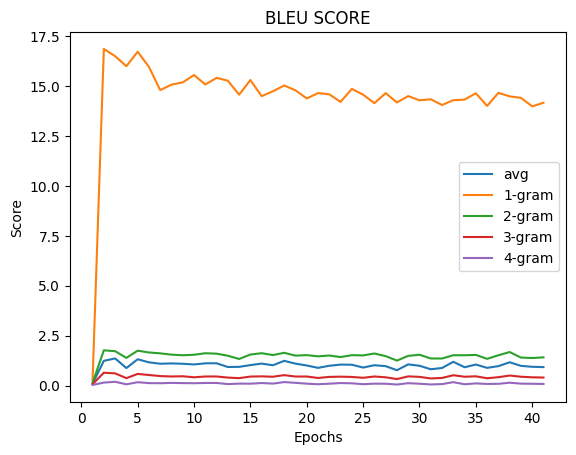

In [42]:
# 訓練模型
for epoch in range(num_epochs):
    train_losses = []
    test_losses = []
    bleu_scores = []

    start_time = time.time()
    train_loss = train(path='./MODELS/translation_model({}).pth'.format(model_name))
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    #break
    print(f'Epoch {epoch+1:02} | Train Time: {epoch_mins}m {epoch_secs}s')

    start_time = time.time()
    test_loss = evaluate()

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    print(f'Epoch {epoch+1:02} | Test Time: {epoch_mins}m {epoch_secs}s')

    start_time = time.time()
    samples = get_samples(TEST_ZSENT,TEST_KSENT,num=2000)
    test_score = sacrebleu_score(model, source_sentences=samples['zh'],target_sentences=samples['ko'])
    #test_score = sacrebleu_score(model, source_sentences=TEST_ZSENT,target_sentences=TEST_KSENT)
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    print(f'Epoch {epoch+1:02} | Eval Time: {epoch_mins}m {epoch_secs}s')

    wandb.log({"Train_loss": train_loss, "Test_loss": test_loss})
    wandb.log({'BLEU_score(avg)':test_score['avg'],'1-gram':test_score['1-gram'],'2-gram':test_score['2-gram'],'3-gram':test_score['3-gram'],'4-gram':test_score['4-gram']})

    # 儲存訓練好的模型
    if(test_score['avg'] > best_score or test_loss < best_loss):
    #if(test_loss < best_loss):
      best_score = test_score['avg']
      best_loss = test_loss
      torch.save(model.state_dict(), './MODELS/best_translation_model({}).pth'.format(model_name))
      print('== save model ==')
    print('\tTrain Loss: {:.3f} | Test Loss: {:.3f}'.format(train_loss, test_loss))
    print('\tBLEU Score:')
    for k in test_score.keys():
        print('\t\t{}: {:.3f}'.format(k,test_score[k]))


    if(test_score['avg'] == 0):
      try:
        model.load_state_dict(torch.load('./MODELS/best_translation_model({}).pth'.format(model_name)))
        print('-'*5,'load_best_model','-'*5)
      except:
        model = TranslationModel(my_model).to(device)
        print('-'*5,'initialize','-'*5)
        #'nothing'

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    bleu_scores.append(test_score)

    loss_history(train_losses, test_losses, path=model_name, to_show=False)
    sacrebleu_history(bleu_scores, path=model_name, to_show=False)
wandb.finish()

In [ ]:
bleu_score(test_source_sentences,model,tokenizer,max_length,device)

In [ ]:
from sacrebleu.metrics import BLEU

def sacrebleu_score(source_sentences,target_sentences,lang='ko'):
  global zh_tokenizer, ko_tokenizer, model, max_length, device
  model.eval()
  bleu = BLEU()
  bleu.trg_lang = lang
  avg_score = {'avg':0,'1-gram':0,'2-gram':0,'3-gram':0,'4-gram':0}

  # 生成目標語句
  generated_sentences = []
  with tqdm(total = len(source_sentences)) as pbar:
    for i in range(len(source_sentences)):
        source_sentence = source_sentences[i]
        target_sentence = target_sentences[i]
        source_tokens = zh_tokenizer(source_sentence, padding=True, truncation=True, return_tensors='pt', max_length=max_length).to(device)
        with torch.no_grad():
            output = model(input_ids=source_tokens.input_ids, attention_mask=source_tokens.attention_mask)
        generated_sentence = ko_tokenizer.decode(output[0].argmax(dim=-1), skip_special_tokens=True)
        gen_sent = ''
        for sent in generated_sentence:
            gen_sent += sent
        bleu_score = bleu.corpus_score([gen_sent],[[target_sentence]])
        #print([gen_sent],[[target_sentence]])
        #print(bleu_score)
        avg_score['avg'] += bleu_score.score
        avg_score['1-gram'] += bleu_score.precisions[0]
        avg_score['2-gram'] += bleu_score.precisions[1]
        avg_score['3-gram'] += bleu_score.precisions[2]
        avg_score['4-gram'] += bleu_score.precisions[3]
        pbar.update(1)
  avg_score['avg'] /= len(source_sentences)
  avg_score['1-gram'] /= len(source_sentences)
  avg_score['2-gram'] /= len(source_sentences)
  avg_score['3-gram'] /= len(source_sentences)
  avg_score['4-gram'] /= len(source_sentences)

  #print('gen:',generated_sentences,'tar:',[[sent] for sent in target_sentences],'sor',source_sentences)
  #print('BLEU Score:',bleu.score)

  return avg_score

In [ ]:
train_score = sacrebleu_score(TRAIN_ZSENT,TRAIN_KSENT)
test_score = sacrebleu_score(TEST_ZSENT,TEST_KSENT)
print('Train:',train_score)
print('Test:',test_score)